# Unit testing

In [1]:
!pwd

/Volumes/GoogleDrive/My Drive/Projects/PereIon_NPC_FLIP/git_npctransport_kinetic


In [2]:
!python test_transport_simulation.py

Registering <function TransportSimulation.get_free_N_to_free_C at 0x7fe5a81831e0>
Registering <function TransportSimulation.get_nmol_GDP_C_to_GDP_N at 0x7fe5a8182f28>
Registering <function TransportSimulation.get_nmol_GDP_N_to_GTP_N at 0x7fe5a8182d90>
Registering <function TransportSimulation.get_nmol_GTP_C_to_GDP_C at 0x7fe5a8182e18>
Registering <function TransportSimulation.get_nmol_GTP_N_to_GTP_C at 0x7fe5a8182ea0>
Registering <function TransportSimulation.get_nmol_cargo_bleached at 0x7fe5a8183400>
Registering <function TransportSimulation.get_nmol_complex_C_to_free_C at 0x7fe5a8183048>
Registering <function TransportSimulation.get_nmol_complex_NPC_to_complex_N_C at 0x7fe5a8183378>
Registering <function TransportSimulation.get_nmol_complex_NPC_to_free_N at 0x7fe5a8182c80>
Registering <function TransportSimulation.get_nmol_complex_NPC_traverse at 0x7fe5a81832f0>
Registering <function TransportSimulation.get_nmol_complex_N_C_to_complex_NPC at 0x7fe5a8183268>
Registering <function Tran

# Model variables - legend:

complexL/U - importin-cargo complex, labeled (L) or unlabeled (U) 

freeL/U - free cargo, labeled (L) or unlabeled (U) 

c - concentration

v - volume

C - cytoplasm

N - nucleues

NPC - nuclear pore complex

nmol - number of molecules

M - molar (moles per liter)

L - liter

fL - femtoliter


In [3]:
import importlib
import transport_simulation
from transport_simulation import TransportSimulation
importlib.reload(transport_simulation)
import transport_simulation
from transport_simulation import TransportSimulation


Registering <function TransportSimulation.get_free_N_to_free_C at 0x7fea206611e0>
Registering <function TransportSimulation.get_nmol_GDP_C_to_GDP_N at 0x7fea20660f28>
Registering <function TransportSimulation.get_nmol_GDP_N_to_GTP_N at 0x7fea20660d90>
Registering <function TransportSimulation.get_nmol_GTP_C_to_GDP_C at 0x7fea20660e18>
Registering <function TransportSimulation.get_nmol_GTP_N_to_GTP_C at 0x7fea20660ea0>
Registering <function TransportSimulation.get_nmol_cargo_bleached at 0x7fea20661400>
Registering <function TransportSimulation.get_nmol_complex_C_to_free_C at 0x7fea20661048>
Registering <function TransportSimulation.get_nmol_complex_NPC_to_complex_N_C at 0x7fea20661378>
Registering <function TransportSimulation.get_nmol_complex_NPC_to_free_N at 0x7fea20660c80>
Registering <function TransportSimulation.get_nmol_complex_NPC_traverse at 0x7fea206612f0>
Registering <function TransportSimulation.get_nmol_complex_N_C_to_complex_NPC at 0x7fea20661268>
Registering <function Tran

# Simulation main code

In [4]:
from matplotlib import pyplot as plt
import numpy as np


def plot_simulation_attributes(stats, 
                               attributes_list, 
                               log=True):
  def merge_lists(lists):
      return [x for y in lists for x in y]
  attributes= merge_lists(attributes_list)
  assert(len(attributes) == sum([len(x) for x in attributes_list]))
  fig, axes= plt.subplots(len(attributes_list),
                          1, 
                          figsize=(10,15), 
                          squeeze= False)
  x= stats['time_sec']
  for cur_attributes, ax in zip(attributes_list, axes[:,0]):
      print(cur_attributes)
      for attr in cur_attributes:
        ax.plot(x, stats[attr], label=attr)
      if log:
        ax.set_yscale('log')
      ax.set_xlabel("time [sec]")
      ax.set_ylabel("nmol")
      ax.legend()
      if is_log:
        ylim= ax.get_ylim()
        ylim= (10.0, ylim[1])
        ax.set_ylim(ylim)
  return axes


In [5]:
# 
def get_ts_time_series(dt_sec, **kwargs):
  ts= TransportSimulation(v_N_L=627e-15,
                          v_C_L=2194e-15,
                          **kwargs)
  ts.bleach_start_time_sec= 400.0
  ts.dt_sec= dt_sec
  ts.set_NPC_dock_sites(n_NPCs= 2000, 
                        n_dock_sites_per_NPC= 500)
  ts.set_passive_nuclear_molar_rate_per_sec(0.02)
  ts.set_params(fraction_complex_NPC_traverse_per_sec= 100,
              rate_free_to_complex_per_sec= 0.05)
  ts.bleach_volume_L_per_sec= 100.0e-15
  #ts.rate_complex_to_NPC_per_free_site_per_sec_per_M= 1.0e+6
  ts.fraction_complex_NPC_to_free_N_per_M_GTP_per_sec = 0.05e+6 # TODO: this is doubled relative to complex_N to free_N
  ts.fraction_complex_N_to_free_N_per_M_GTP_per_sec = 0.05e+6
  return ts

def get_ts_time_series_2(passive_nuclear_molar_rate_per_sec,
                                        is_force,
                            **kwargs):
    if is_force:
        v_N_L=762e-15
        v_C_L=4768e-15
    else:
        v_N_L=627e-15
        v_C_L=2194e-15           
    ts= transport_simulation.TransportSimulation(v_N_L= v_N_L,
                                                v_C_L= v_C_L)      
    ts.set_time_step(1.0e-3)
    ts.set_NPC_dock_sites(n_NPCs= 2000, 
                        n_dock_sites_per_NPC= 500)
    ts.set_passive_nuclear_molar_rate_per_sec(passive_nuclear_molar_rate_per_sec) #get_passive_export_rate_per_sec(27,1))
    ts.fraction_complex_NPC_to_free_N_per_M_GTP_per_sec = 10.0e+6 # TODO: this is doubled relative to complex_N to free_N
    ts.fraction_complex_N_to_free_N_per_M_GTP_per_sec = 10.0e+6
    ts.rate_complex_to_NPC_per_free_site_per_sec_per_M= 50.0e+6
    ts.fraction_complex_NPC_to_complex_N_C_per_sec= 25.0 # Leakage parameter
    ts.rate_GDP_N_to_GTP_N_per_sec= 200.0
    ts.rate_GTP_N_to_GDP_N_per_sec= 2.0
    ts.rate_GTP_C_to_GDP_C_per_sec= 500.0
    ts.rate_GTP_N_to_GTP_C_per_sec = 25.0
    ts.rate_GDP_C_to_GDP_N_per_sec = 3.0
    ts.rate_GDP_N_to_GDP_C_per_sec = 3.0
    ts.rate_complex_to_free_per_sec = 0.05
    ts.rate_free_to_complex_per_sec = 0.05
    ts.fraction_complex_NPC_traverse_per_sec=200
    ts.set_params(**kwargs) # override defaults
    return ts

def get_ts_time_series_3(passive_nuclear_molar_rate_per_sec,
                                        is_force,
                         dt_sec=0.3e-3,
                            **kwargs):
    if is_force:
        v_N_L=762e-15
        v_C_L=4768e-15
    else:
        v_N_L=627e-15
        v_C_L=2194e-15    
    ts= transport_simulation.TransportSimulation(v_N_L= v_N_L,
                                                v_C_L= v_C_L)      
    ts.set_time_step(dt_sec)
    ts.set_NPC_dock_sites(n_NPCs= 2000, 
                        n_dock_sites_per_NPC= 500)
    ts.set_passive_nuclear_molar_rate_per_sec(passive_nuclear_molar_rate_per_sec) #get_passive_export_rate_per_sec(27,1))
    ts.fraction_complex_NPC_to_free_N_per_M_GTP_per_sec = 1.0e+6 # TODO: this is doubled relative to complex_N to free_N
    ts.fraction_complex_N_to_free_N_per_M_GTP_per_sec = 1.0e+6
    ts.rate_complex_to_NPC_per_free_site_per_sec_per_M= 50e+6
    ts.fraction_complex_NPC_to_complex_N_C_per_sec= 1000.0 # Leakage parameter
    ts.rate_GDP_N_to_GTP_N_per_sec= 1000.0
    ts.rate_GTP_N_to_GDP_N_per_sec= 0.2
    ts.rate_GTP_C_to_GDP_C_per_sec= 500.0
    ts.rate_GTP_N_to_GTP_C_per_sec = 0.5
    ts.rate_GDP_C_to_GDP_N_per_sec = 1.0
    ts.rate_GDP_N_to_GDP_C_per_sec = 1.0 
    ts.rate_complex_to_free_per_sec = 0.05
    ts.rate_free_to_complex_per_sec = 0.01
    ts.fraction_complex_NPC_traverse_per_sec=4000
    ts.set_params(**kwargs) # override defaults
    return ts

In [6]:
# RUN:
sim_time_sec= 50.0
sim_flags= dict()#rate_free_to_complex_per_sec=1.0,
                #max_passive_diffusion_rate_nmol_per_sec_per_M=2e7)
#ts= get_ts_time_series(dt_sec= 2e-3, **sim_flags)
ts= get_ts_time_series_3(passive_nuclear_molar_rate_per_sec=0.04,
                         is_force= False,
                         **sim_flags)
stats= ts.simulate(sim_time_sec, nskip_statistics= 10)

['GDP_N', 'GDP_C', 'GTP_N', 'GTP_C']
['complexL_NPC_C_import', 'complexL_NPC_C_export', 'complexL_NPC_N_import', 'complexL_NPC_N_export', 'freeL_N', 'freeL_C', 'complexL_C', 'complexL_N']
['complexU_NPC_C_import', 'complexU_NPC_C_export', 'complexU_NPC_N_import', 'complexU_NPC_N_export', 'freeU_N', 'freeU_C', 'complexU_C', 'complexU_N']


/Users/Admin/Public/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


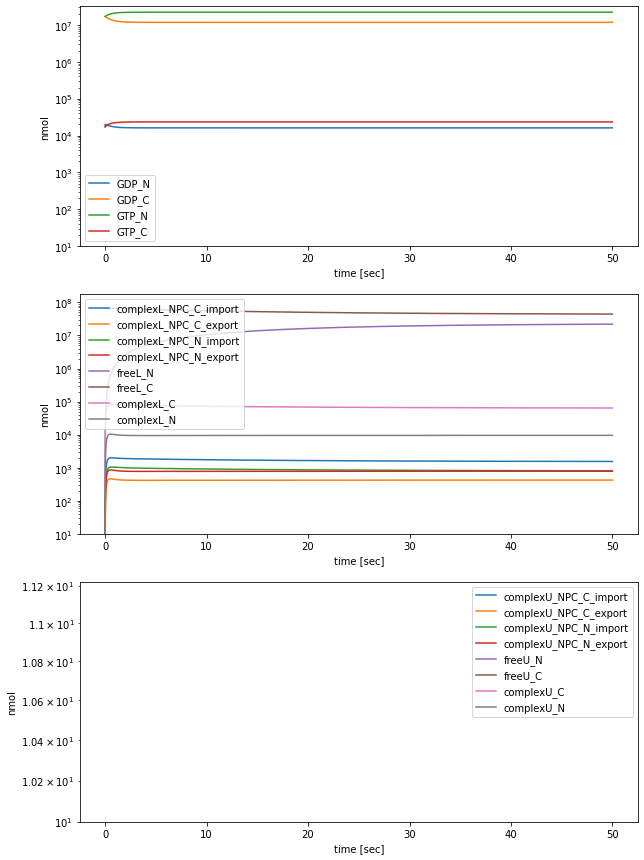

In [7]:
#### 
RAN_attributes = ['GDP_N', 'GDP_C', 'GTP_N', 'GTP_C']
cargoL_attributes= ['complexL_NPC_C_import', 'complexL_NPC_C_export',
                    'complexL_NPC_N_import', 'complexL_NPC_N_export',
                    'freeL_N', 'freeL_C', 'complexL_C', 'complexL_N']
cargoU_attributes= ['complexU_NPC_C_import', 'complexU_NPC_C_export', 
                    'complexU_NPC_N_import', 'complexU_NPC_N_export',
                    'freeU_N', 'freeU_C', 'complexU_C', 'complexU_N']
c_attributes = ["c_C_M", "c_C_M"]
b_attributes = ['fraction_C_b', "c_C_M", ]
npc_attributes = ['nmol_NPC']
dock_attributes = ['c_C_M', 'fraction_C_b', 'nmol_NPC', 'NPC_dock_capacity']
is_log= True
ax= plot_simulation_attributes(
    stats, 
    [ RAN_attributes, 
     cargoL_attributes, 
     cargoU_attributes ],
    log= is_log)

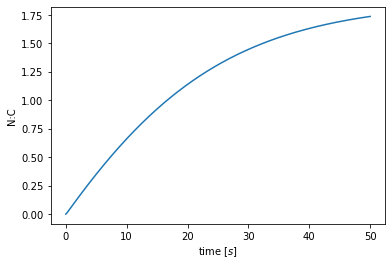

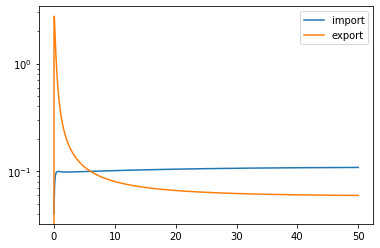

In [8]:
## plt.figure()
plt.plot(stats['time_sec'], 
         (stats['freeL_N']+stats['complexL_N']+stats['freeU_N']+stats['complexU_N']) 
         / (stats['freeL_C']+stats['complexL_C']+stats['freeU_C']+stats['complexU_C']) * (ts.get_v_C_L()/ts.get_v_N_L()))
plt.xlabel(r'time [$s$]')
plt.ylabel(r'N:C')
#plt.ylim(0,5)
plt.figure()
for tag in ['import','export']:
    plt.plot(stats['time_sec'],
            stats[f'nuclear_{tag}L_per_sec'],
            label=tag)
    plt.yscale('log')
    plt.legend()

### Slow/normal

['complexL_NPC_C_import', 'complexL_NPC_C_export', 'complexL_NPC_N_import', 'complexL_NPC_N_export', 'freeL_N', 'freeL_C', 'complexL_C', 'complexL_N']
['complexL_NPC_C_import', 'complexL_NPC_C_export', 'complexL_NPC_N_import', 'complexL_NPC_N_export', 'freeL_N', 'freeL_C', 'complexL_C', 'complexL_N']


Text(0.5, 1.0, 'normal GDP_N to GTP_N rate')

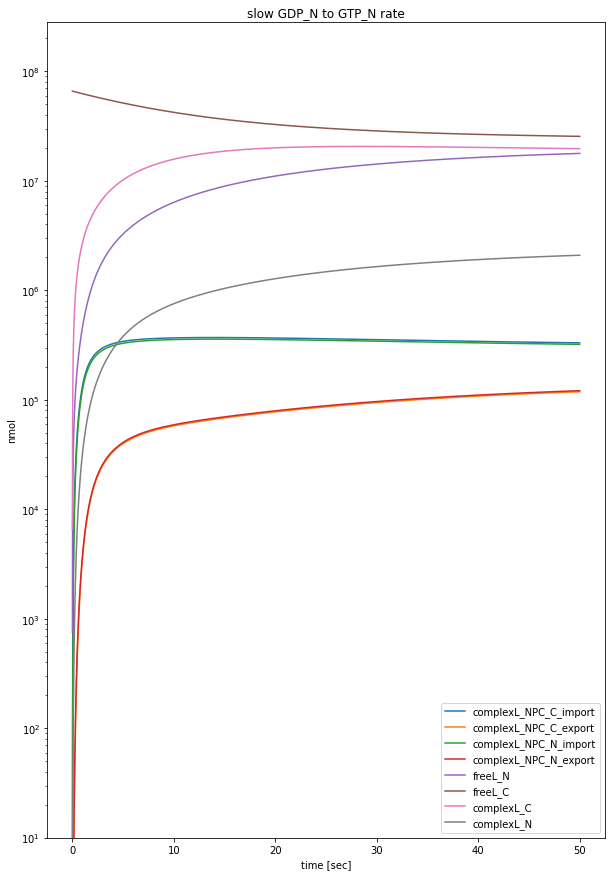

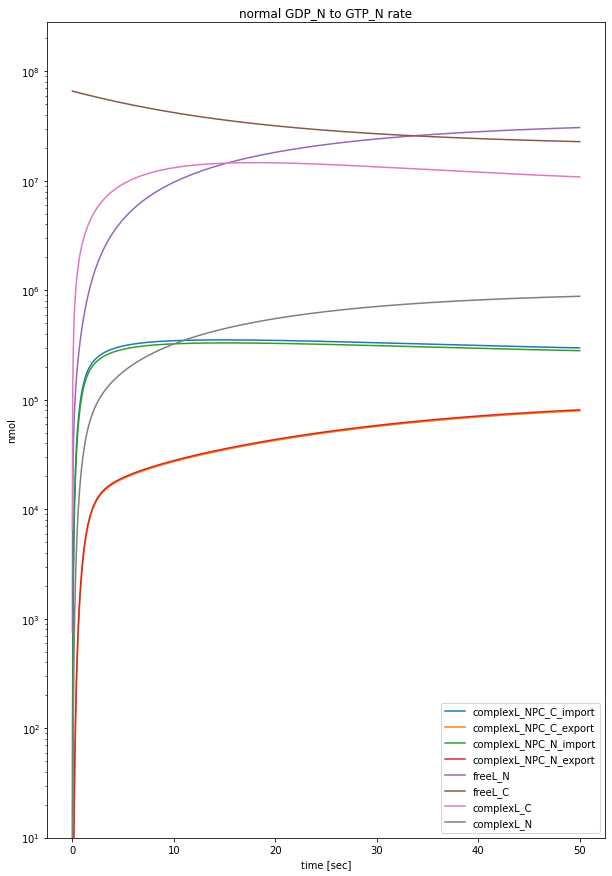

In [9]:
ts_slow=  get_ts_time_series(2e-3, 
                            rate_GDP_N_to_GTP_N_per_sec=0.2)
#fig, ax = plt.subplots(1, 3,figsize=(40,5))
stats_slow= ts_slow.simulate(sim_time_sec)
ax = plot_simulation_attributes(stats_slow, 
                                           [cargoL_attributes], 
                                           log= is_log)
plt.title("slow GDP_N to GTP_N rate")
ts_normal=  get_ts_time_series(2e-3)
stats_normal= ts_normal.simulate(sim_time_sec)
ax = plot_simulation_attributes(stats_normal,
                                           [cargoL_attributes], 
                                           log= is_log)
plt.title("normal GDP_N to GTP_N rate")

## Map parameters phasespace of transport

In [10]:
import map_param_grid
importlib.reload(map_param_grid)

<module 'map_param_grid' from '/Volumes/GoogleDrive/My Drive/Projects/PereIon_NPC_FLIP/git_npctransport_kinetic/map_param_grid.py'>

### Run:

In [11]:
def get_param_range_D_kon(nx, ny):
    param_range= {}
    print(f"nx={nx} ny={ny}")
    epsilon = 1e-9
    v_N_L= 627e-15
    param_range['tag_x']= "max_passive_diffusion_rate_nmol_per_sec_per_M"
    param_range['range_x']= np.logspace(-4, 0, nx) * transport_simulation.N_A * v_N_L # divided to convert from nuclear passive diffudsion rate r, where dN/dt = r*([C]-[N]))
    param_range['pretty_x']= r"passive diffusion rate [$s^{-1} M^{-1}$]"
    param_range['tag_y']= "rate_free_to_complex_per_sec"
    param_range['range_y']= np.logspace(-4, 0, ny)
    param_range['pretty_y']= r"NTR $k_{on}$ [$sec^{-1}$]"
    return param_range
print("hi")

hi


In [12]:
import multiprocessing

def get_transport_simulation_map_passive(**kwargs):
    ts= transport_simulation.TransportSimulation(**kwargs) 
    ts.set_time_step(1e-3)
    ts.set_v_N_L(627e-15, True)
    ts.set_v_C_L(2194e-15, True)
    ts.set_NPC_dock_sites(n_NPCs= 2000, 
                        n_dock_sites_per_NPC= 500)
    ts.fraction_complex_NPC_to_free_N_per_M_GTP_per_sec = 0.5e+6 # TODO: this is doubled relative to complex_N to free_N
    ts.fraction_complex_N_to_free_N_per_M_GTP_per_sec = 0.5e+6
    return ts

n_processors= multiprocessing.cpu_count()
param_range= get_param_range_D_kon(nx= 9, ny= 9)
stats_grids_passive, ts_passive= map_param_grid.map_param_grid_parallel( param_range,
                                      equilibration_time_sec= 600.0,
                                      n_processors= n_processors-2,
                                    transport_simulation_generator= get_transport_simulation_map_passive)


nx=9 ny=9
change v_N_L from 4.35e-15 to 6.27e-13
Scaling complexL_N by 144.13793103448273 from 0
Scaling freeL_N by 144.13793103448273 from 0.0
Scaling complexU_N by 144.13793103448273 from 0
Scaling freeU_N by 144.13793103448273 from 0
Scaling GTP_N by 144.13793103448273 from 362162.2377622378
Scaling GDP_N by 144.13793103448273 from 362.1622377622378
change v_C_L from 6.27e-13 to 2.194e-12
Param max_passive_diffusion_rate_nmol_per_sec_per_M default value is 20000
Param rate_free_to_complex_per_sec default value is 0.1
njobs=81
change v_N_L from 4.35e-15 to 6.27e-13change v_N_L from 4.35e-15 to 6.27e-13change v_N_L from 4.35e-15 to 6.27e-13change v_N_L from 4.35e-15 to 6.27e-13change v_N_L from 4.35e-15 to 6.27e-13
change v_N_L from 4.35e-15 to 6.27e-13change v_N_L from 4.35e-15 to 6.27e-13
change v_N_L from 4.35e-15 to 6.27e-13change v_N_L from 4.35e-15 to 6.27e-13
change v_N_L from 4.35e-15 to 6.27e-13


Scaling complexL_N by 144.13793103448273 from 0
Scaling complexL_N by 144.13793

Scaling GDP_N by 144.13793103448273 from 362.1622377622378
change v_C_L from 6.27e-13 to 2.194e-12
change v_N_L from 4.35e-15 to 6.27e-13
Scaling complexL_N by 144.13793103448273 from 0
Scaling freeL_N by 144.13793103448273 from 0.0
Scaling complexU_N by 144.13793103448273 from 0
Scaling freeU_N by 144.13793103448273 from 0
Scaling GTP_N by 144.13793103448273 from 362162.2377622378
Scaling GDP_N by 144.13793103448273 from 362.1622377622378
change v_C_L from 6.27e-13 to 2.194e-12
change v_N_L from 4.35e-15 to 6.27e-13
Scaling complexL_N by 144.13793103448273 from 0
Scaling freeL_N by 144.13793103448273 from 0.0
Scaling complexU_N by 144.13793103448273 from 0
Scaling freeU_N by 144.13793103448273 from 0
Scaling GTP_N by 144.13793103448273 from 362162.2377622378
Scaling GDP_N by 144.13793103448273 from 362.1622377622378
change v_C_L from 6.27e-13 to 2.194e-12
change v_N_L from 4.35e-15 to 6.27e-13
Scaling complexL_N by 144.13793103448273 from 0
Scaling freeL_N by 144.13793103448273 from 0

Scaling complexU_N by 144.13793103448273 from 0
Scaling freeU_N by 144.13793103448273 from 0
Scaling GTP_N by 144.13793103448273 from 362162.2377622378
Scaling GDP_N by 144.13793103448273 from 362.1622377622378
change v_C_L from 6.27e-13 to 2.194e-12
change v_N_L from 4.35e-15 to 6.27e-13
Scaling complexL_N by 144.13793103448273 from 0
Scaling freeL_N by 144.13793103448273 from 0.0
Scaling complexU_N by 144.13793103448273 from 0
Scaling freeU_N by 144.13793103448273 from 0
Scaling GTP_N by 144.13793103448273 from 362162.2377622378
Scaling GDP_N by 144.13793103448273 from 362.1622377622378
change v_C_L from 6.27e-13 to 2.194e-12
change v_N_L from 4.35e-15 to 6.27e-13
Scaling complexL_N by 144.13793103448273 from 0
Scaling freeL_N by 144.13793103448273 from 0.0
Scaling complexU_N by 144.13793103448273 from 0
Scaling freeU_N by 144.13793103448273 from 0
Scaling GTP_N by 144.13793103448273 from 362162.2377622378
Scaling GDP_N by 144.13793103448273 from 362.1622377622378
change v_C_L from 6

Scaling freeL_N by 144.13793103448273 from 0.0
Scaling complexU_N by 144.13793103448273 from 0
Scaling freeU_N by 144.13793103448273 from 0
Scaling GTP_N by 144.13793103448273 from 362162.2377622378
Scaling GDP_N by 144.13793103448273 from 362.1622377622378
change v_C_L from 6.27e-13 to 2.194e-12
change v_N_L from 4.35e-15 to 6.27e-13
Scaling complexL_N by 144.13793103448273 from 0
Scaling freeL_N by 144.13793103448273 from 0.0
Scaling complexU_N by 144.13793103448273 from 0
Scaling freeU_N by 144.13793103448273 from 0
Scaling GTP_N by 144.13793103448273 from 362162.2377622378
Scaling GDP_N by 144.13793103448273 from 362.1622377622378
change v_C_L from 6.27e-13 to 2.194e-12
change v_N_L from 4.35e-15 to 6.27e-13
Scaling complexL_N by 144.13793103448273 from 0
Scaling freeL_N by 144.13793103448273 from 0.0
Scaling complexU_N by 144.13793103448273 from 0
Scaling freeU_N by 144.13793103448273 from 0
Scaling GTP_N by 144.13793103448273 from 362162.2377622378
Scaling GDP_N by 144.1379310344

1.0 8.0
{'tag_x': 'max_passive_diffusion_rate_nmol_per_sec_per_M', 'range_x': array([3.7757940e+07, 1.1940109e+08, 3.7757940e+08, 1.1940109e+09,
       3.7757940e+09, 1.1940109e+10, 3.7757940e+10, 1.1940109e+11,
       3.7757940e+11]), 'pretty_x': 'passive diffusion rate [$s^{-1} M^{-1}$]', 'tag_y': 'rate_free_to_complex_per_sec', 'range_y': array([1.00000000e-04, 3.16227766e-04, 1.00000000e-03, 3.16227766e-03,
       1.00000000e-02, 3.16227766e-02, 1.00000000e-01, 3.16227766e-01,
       1.00000000e+00]), 'pretty_y': 'NTR $k_{on}$ [$sec^{-1}$]'}
{'tag_x': 'max_passive_diffusion_rate_nmol_per_sec_per_M', 'range_x': array([1.00000000e-04, 3.16227766e-04, 1.00000000e-03, 3.16227766e-03,
       1.00000000e-02, 3.16227766e-02, 1.00000000e-01, 3.16227766e-01,
       1.00000000e+00]), 'pretty_x': 'dN/dt passive rate [$s^{-1}$]', 'tag_y': 'rate_free_to_complex_per_sec', 'range_y': array([1.00000000e-04, 3.16227766e-04, 1.00000000e-03, 3.16227766e-03,
       1.00000000e-02, 3.16227766e-02, 1.00

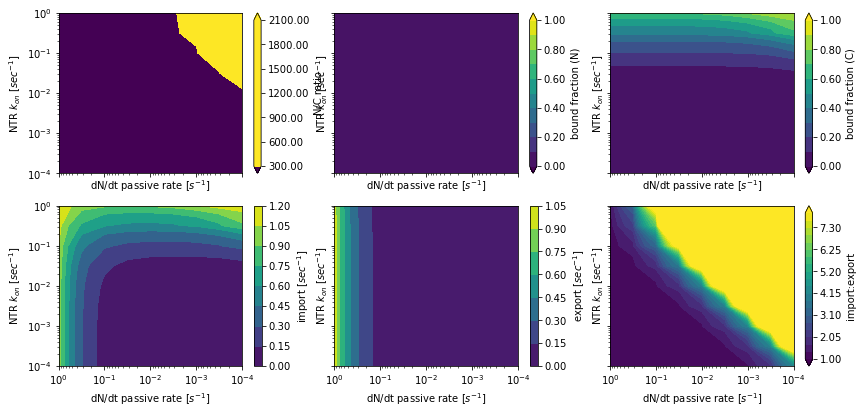

In [13]:
param_range2= param_range.copy()
param_range2['pretty_x'] = r"dN/dt passive rate [$s^{-1}$]"
param_range2['range_x'] = param_range['range_x'] / transport_simulation.N_A / ts_passive.get_v_N_L()
fig, axes= plt.subplots(2,3, figsize=(14, 6.5), sharex=True, sharey=True)
NC_min=1.0
NC_max= 8.0
# N/C
plt.sca(axes[0,0])
map_param_grid.plot_NC_ratios(param_range2, stats_grids_passive, ts_passive,
                             vmin= NC_min, vmax= NC_max)
# Bound fraction
map_param_grid.plot_bound_fraction(param_range2, stats_grids_passive, 
                                   'N', ax=axes[0,1])
map_param_grid.plot_bound_fraction(param_range2, stats_grids_passive, 
                                   'C', ax=axes[0,2])
# Import/export
map_param_grid.plot_import_export(param_range2,
                                  stats_grids_passive,
                                  axes=[axes[1,0], axes[1,1]])
plt.sca(axes[1,2])
ratios_import_export= map_param_grid.get_import_export_ratios(stats_grids_passive)
map_param_grid.plot_param_grid(param_range2, 
                ratios_import_export,
                Z_label= 'import:export',
                vmin= NC_min, vmax= NC_max, 
                levels=np.linspace(NC_min, NC_max, 21),
                extend= 'both')
print(param_range)
print(param_range2)


## map traverse

In [14]:
import map_param_grid
import transport_simulation
import importlib
import numpy as np
import multiprocessing
importlib.reload(map_param_grid)
importlib.reload(transport_simulation)

Registering <function TransportSimulation.get_free_N_to_free_C at 0x7fea28c32ae8>
Registering <function TransportSimulation.get_nmol_GDP_C_to_GDP_N at 0x7fea28c328c8>
Registering <function TransportSimulation.get_nmol_GDP_N_to_GTP_N at 0x7fea28c32730>
Registering <function TransportSimulation.get_nmol_GTP_C_to_GDP_C at 0x7fea28c327b8>
Registering <function TransportSimulation.get_nmol_GTP_N_to_GTP_C at 0x7fea28c32840>
Registering <function TransportSimulation.get_nmol_cargo_bleached at 0x7fea28c32d08>
Registering <function TransportSimulation.get_nmol_complex_C_to_free_C at 0x7fea28c32950>
Registering <function TransportSimulation.get_nmol_complex_NPC_to_complex_N_C at 0x7fea28c32c80>
Registering <function TransportSimulation.get_nmol_complex_NPC_to_free_N at 0x7fea28c32620>
Registering <function TransportSimulation.get_nmol_complex_NPC_traverse at 0x7fea28c32bf8>
Registering <function TransportSimulation.get_nmol_complex_N_C_to_complex_NPC at 0x7fea28c32b70>
Registering <function Tran

<module 'transport_simulation' from '/Volumes/GoogleDrive/My Drive/Projects/PereIon_NPC_FLIP/git_npctransport_kinetic/transport_simulation.py'>

In [15]:
def get_param_range_traverse_kon(nx, ny):
    param_range= {}
    print(f"nx={nx} ny={ny}")
    param_range['tag_x']= "fraction_complex_NPC_traverse_per_sec"
    param_range['range_x']= np.logspace(-1, 4, nx) 
    param_range['pretty_x']= r"rate NPC traverse [$sec^{-1}$]"
    param_range['tag_y']= "rate_free_to_complex_per_sec"
    param_range['range_y']= np.logspace(-3, 2, ny)
    param_range['pretty_y']= r"NTR $k_{on}$ [$sec^{-1}$]"
    return param_range

In [16]:
def get_transport_simulation_by_passive(passive_nuclear_molar_rate_per_sec,
                                        is_force,
                                        **kwargs):    
    if is_force:
        v_N_L=762e-15
        v_C_L=4768e-15
    else:
        v_N_L=627e-15
        v_C_L=2194e-15    
    ts= transport_simulation.TransportSimulation(v_N_L= v_N_L,
                                                v_C_L= v_C_L)
    ts.set_time_step(0.2e-3)
    ts.set_NPC_dock_sites(n_NPCs= 2000, 
                        n_dock_sites_per_NPC= 500)
    ts.set_passive_nuclear_molar_rate_per_sec(passive_nuclear_molar_rate_per_sec) #get_passive_export_rate_per_sec(27,1))
    ts.fraction_complex_NPC_to_free_N_per_M_GTP_per_sec = 1.0e+6 # TODO: this is doubled relative to complex_N to free_N
    ts.fraction_complex_N_to_free_N_per_M_GTP_per_sec = 1.0e+6
    ts.rate_complex_to_NPC_per_free_site_per_sec_per_M= 50e+6
    ts.fraction_complex_NPC_to_complex_N_C_per_sec= 3000.0 # Leakage parameter
    ts.rate_GDP_N_to_GTP_N_per_sec= 1000.0
    ts.rate_GTP_N_to_GDP_N_per_sec= 0.2
    ts.rate_GTP_C_to_GDP_C_per_sec= 500.0
    ts.rate_GTP_N_to_GTP_C_per_sec = 0.5
    ts.rate_GDP_C_to_GDP_N_per_sec = 1.0
    ts.rate_GDP_N_to_GDP_C_per_sec = 1.0 
    ts.rate_complex_to_free_per_sec = 0.05
    ts.rate_free_to_complex_per_sec = 0.01 # SCAN
    ts.fraction_complex_NPC_traverse_per_sec=4000 # SCAN
    ts.set_params(**kwargs) # override defaults
    return ts
test_ts= get_transport_simulation_by_passive(0.02, False)
print(test_ts.max_passive_diffusion_rate_nmol_per_sec_per_M)

7551588000.0


In [17]:
import map_param_grid
importlib.reload(map_param_grid)
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('image', cmap='RdYlBu')

def plot_stats_grids(stats_grids, transport_simulation,
                        NC_min=0.0,
                        NC_max= 10.0,
                        vmax_import_export=10.0):
    fig, axes= plt.subplots(3,3, figsize=(14, 10), sharex=True, sharey=True)
    # N/C
    plt.sca(axes[0,0])
    map_param_grid.plot_NC_ratios(param_range, 
                                  stats_grids, 
                                  transport_simulation, 
                                  vmin= NC_min,
                                  vmax= NC_max,
                                  levels= np.linspace(NC_min, NC_max, 21)
#                                  levels= np.logspace(np.log10(NC_min),np.log10(NC_max),11),
#                                  locator= mpl.ticker.LogLocator(base=1.05)
                                 )
    # Bound fraction
    map_param_grid.plot_bound_fraction(param_range, stats_grids, 
                                       'N', ax=axes[0,1])
    map_param_grid.plot_bound_fraction(param_range, stats_grids, 
                                       'C', ax=axes[0,2])
    # Import/export
    import_export_locator= mpl.ticker.LogLocator(subs=[1.0, 5.0])
    map_param_grid.plot_import_export(param_range,
                                      stats_grids,
                                      axes= [axes[1,0], axes[1,1]],
                                   vmin= 0.01,
                                   vmax= vmax_import_export,
#                    levels=np.linspace(0.0,vmax_import_export,20),
                    levels= np.logspace(np.log10(1e-2),np.log10(vmax_import_export),21),
                                      locator= import_export_locator, 
                                     extend='both')
    plt.sca(axes[1,2])
    ratios_import_export= map_param_grid.get_import_export_ratios(stats_grids)
    map_param_grid.plot_param_grid(param_range, 
                    ratios_import_export,
                    Z_label= 'import:export',
                    vmin= NC_min,
                    vmax= NC_max,
                    levels=np.linspace(NC_min, NC_max, 21),
                    extend='both')
    
    plt.sca(axes[2,0])
    GTP_ratio= stats_grids['GTP_N']/stats_grids['GTP_C']
    map_param_grid.plot_param_grid(param_range, 
                    GTP_ratio,
                    Z_label= f"GTP N:C",
                    vmin=0.0, 
                     vmax=2000.0, 
                     levels=np.linspace(0,2000,21), 
                     extend='both')
    plt.sca(axes[2,1])
    GDP_ratio= stats_grids['GDP_C']/stats_grids['GDP_N']
    map_param_grid.plot_param_grid(param_range, 
                    GDP_ratio,
                    Z_label= f"GDP C:N",
                    vmin=0.0, 
#                     vmax=vmax, 
#                     levels=np.linspace(0,vmax,11), 
                     extend='both')
    plt.sca(axes[2,2])
    Ran_ratio= (stats_grids['GTP_N']+stats_grids['GDP_N'])/(stats_grids['GTP_C']+stats_grids['GDP_C'])
    map_param_grid.plot_param_grid(param_range, 
                    Ran_ratio,
                    Z_label= f"Ran N:C",
                    vmin=0.0, 
                     vmax=20, 
                    levels=np.linspace(0,20,21), 
                     extend='both')
    plt.show()

nx=7 ny=7
{'tag_x': 'fraction_complex_NPC_traverse_per_sec', 'range_x': array([1.00000000e-01, 6.81292069e-01, 4.64158883e+00, 3.16227766e+01,
       2.15443469e+02, 1.46779927e+03, 1.00000000e+04]), 'pretty_x': 'rate NPC traverse [$sec^{-1}$]', 'tag_y': 'rate_free_to_complex_per_sec', 'range_y': array([1.00000000e-03, 6.81292069e-03, 4.64158883e-02, 3.16227766e-01,
       2.15443469e+00, 1.46779927e+01, 1.00000000e+02]), 'pretty_y': 'NTR $k_{on}$ [$sec^{-1}$]'}
Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=5 j=3 r=0.04496712366245936)
Finished some ten jobs (at i=1 j=4 r=0.061010675515123625)
Finished some ten jobs (at i=3 j=4 r=0.05378326257069732)
passive rate 0.01 is force False
0.0 10.0


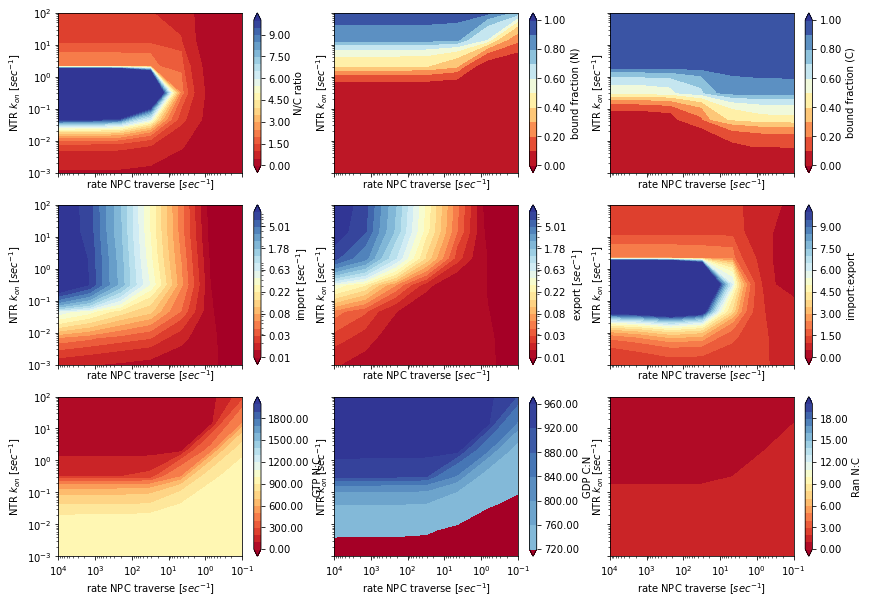

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=0 j=2 r=0.0949353991558971)
Finished some ten jobs (at i=2 j=4 r=0.059718608779441795)
Finished some ten jobs (at i=3 j=5 r=0.04069461513239203)
Finished some ten jobs (at i=5 j=5 r=0.034826941652201904)
Finished some ten jobs (at i=0 j=6 r=0.09306176208447381)
Finished some ten jobs (at i=2 j=5 r=0.014540579990440783)
passive rate 0.01 is force True
0.0 10.0


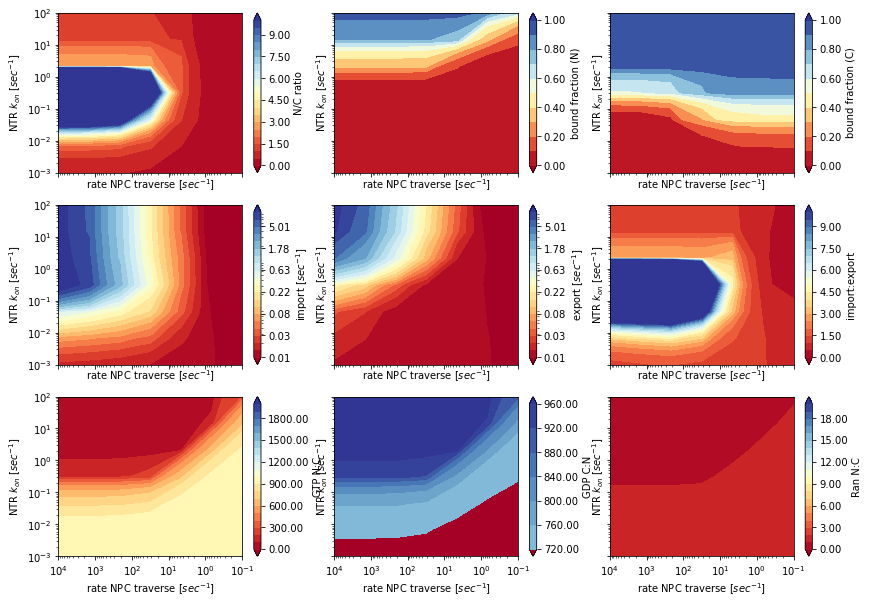

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=2 j=0 r=0.02870089413926702)
Finished some ten jobs (at i=4 j=0 r=0.0955612758931258)
Finished some ten jobs (at i=6 j=2 r=0.08052875596232767)
Finished some ten jobs (at i=3 j=3 r=0.07363012965747828)
passive rate 0.013130324344878838 is force False
0.0 10.0


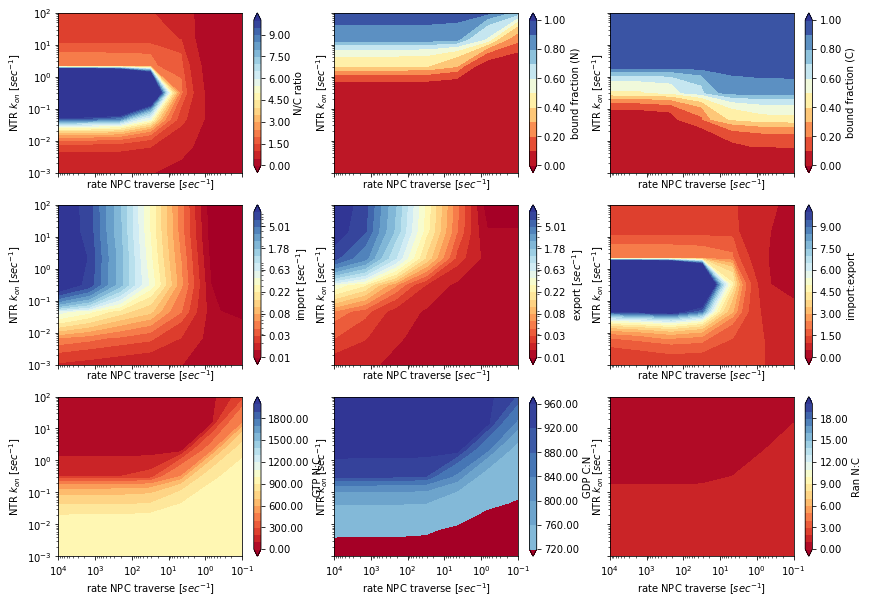

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=3 j=1 r=0.02572664423044635)Finished some ten jobs (at i=6 j=0 r=0.09149116163413384)

Finished some ten jobs (at i=5 j=0 r=0.09216365242473457)
Finished some ten jobs (at i=3 j=0 r=0.0007443058864975427)
Finished some ten jobs (at i=0 j=3 r=0.03040486106848128)
Finished some ten jobs (at i=3 j=4 r=0.0015400374323808474)
Finished some ten jobs (at i=4 j=5 r=0.01743039629998422)
passive rate 0.013130324344878838 is force True
0.0 10.0


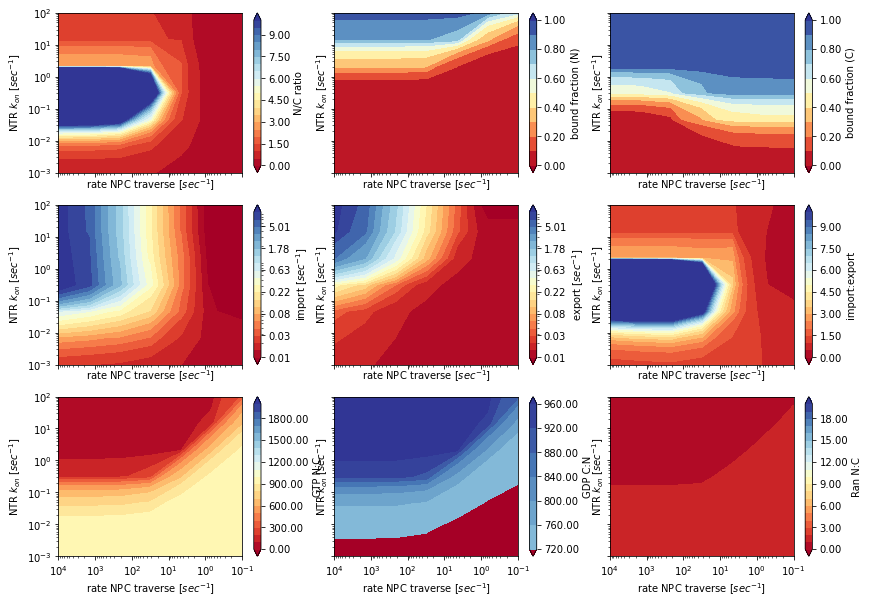

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=1 j=1 r=0.09992355508252126)
Finished some ten jobs (at i=2 j=1 r=0.005760006913055449)
Finished some ten jobs (at i=1 j=2 r=0.027462907588724494)
Finished some ten jobs (at i=5 j=0 r=0.008096435604327157)
Finished some ten jobs (at i=2 j=4 r=0.01868810167734447)
Finished some ten jobs (at i=6 j=5 r=0.04545203113353846)
passive rate 0.017240541740171793 is force False
0.0 10.0


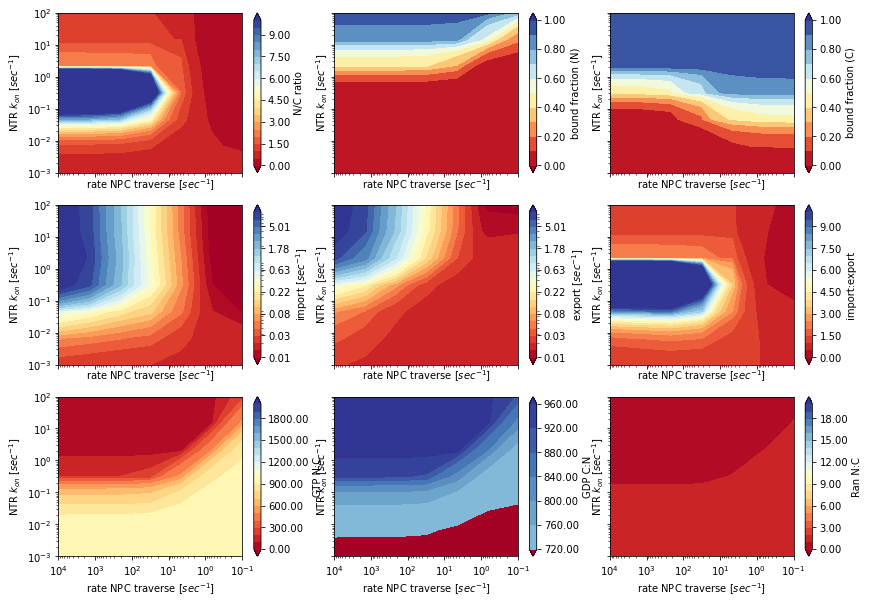

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=5 j=2 r=0.01231117962519368)
Finished some ten jobs (at i=2 j=5 r=0.03110416979536479)
passive rate 0.017240541740171793 is force True
0.0 10.0


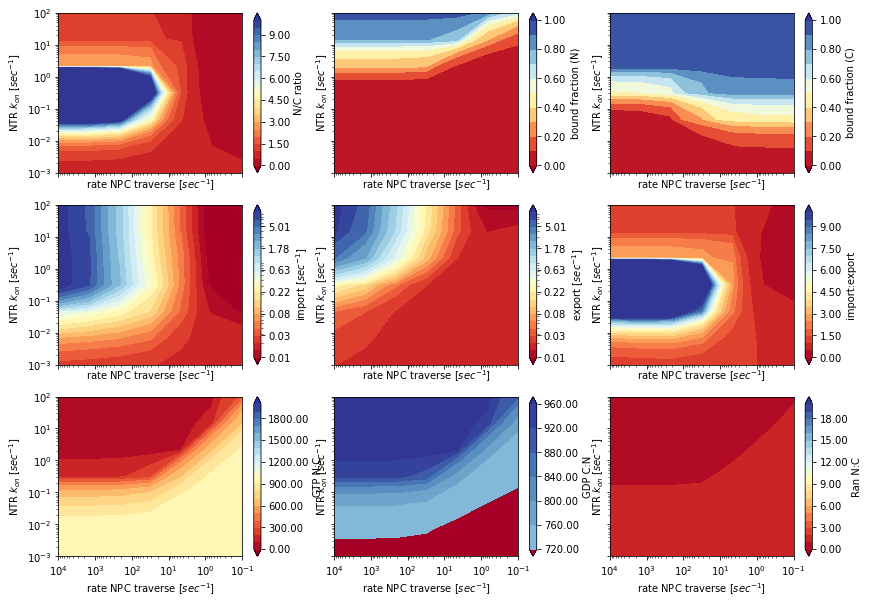

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=3 j=2 r=0.07393699059771164)
Finished some ten jobs (at i=5 j=3 r=0.05439508093132284)
Finished some ten jobs (at i=4 j=3 r=0.09441711886284976)
Finished some ten jobs (at i=2 j=6 r=0.044582489135524095)
Finished some ten jobs (at i=6 j=5 r=0.0974159310560111)
Finished some ten jobs (at i=5 j=6 r=0.08060181896924667)
passive rate 0.022637390492987748 is force False
0.0 10.0


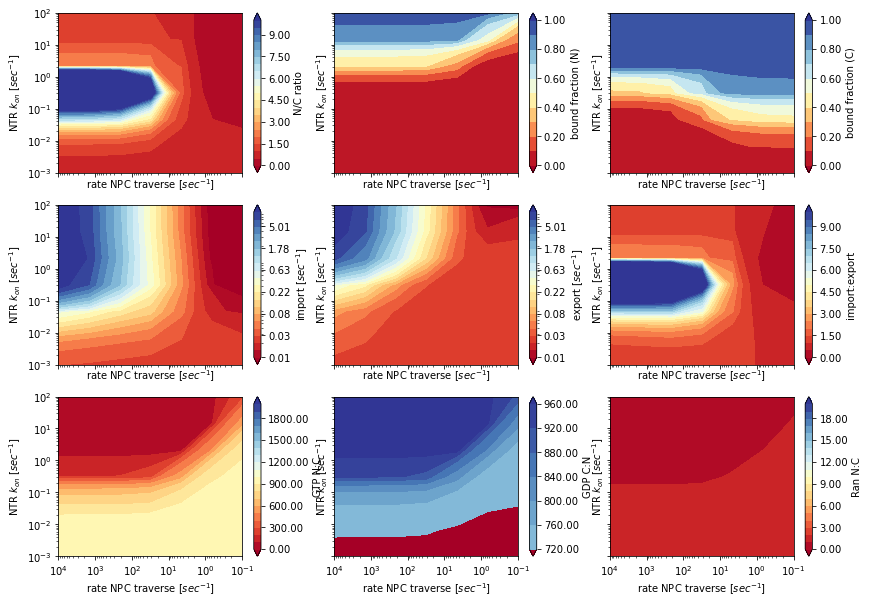

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=4 j=0 r=0.04517263015102735)
Finished some ten jobs (at i=1 j=4 r=0.0973395925810997)
Finished some ten jobs (at i=2 j=5 r=0.049524875811337354)
Finished some ten jobs (at i=6 j=5 r=0.06885871753784556)
Finished some ten jobs (at i=1 j=6 r=0.07721707472665029)
passive rate 0.022637390492987748 is force True
0.0 10.0


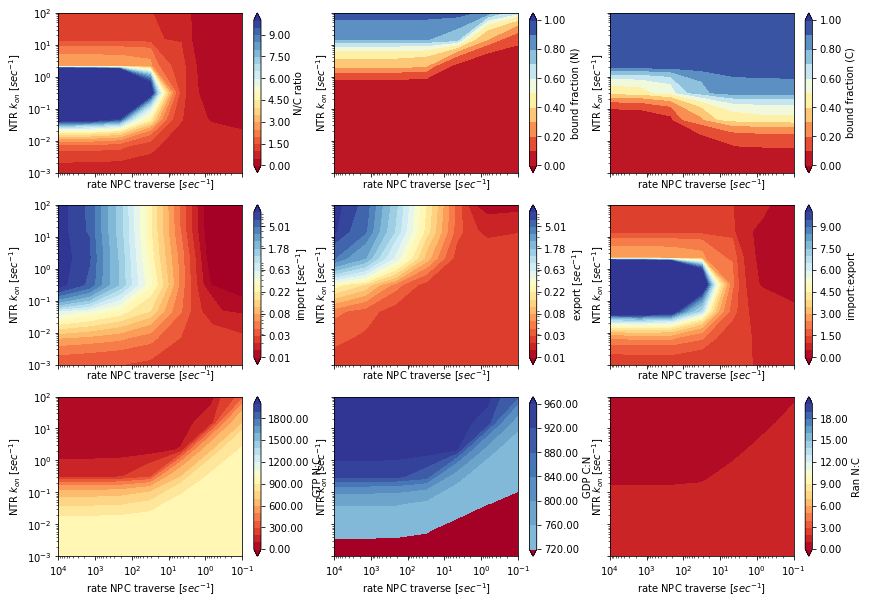

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=5 j=3 r=0.025546720054547722)
passive rate 0.02972362794946059 is force False
0.0 10.0


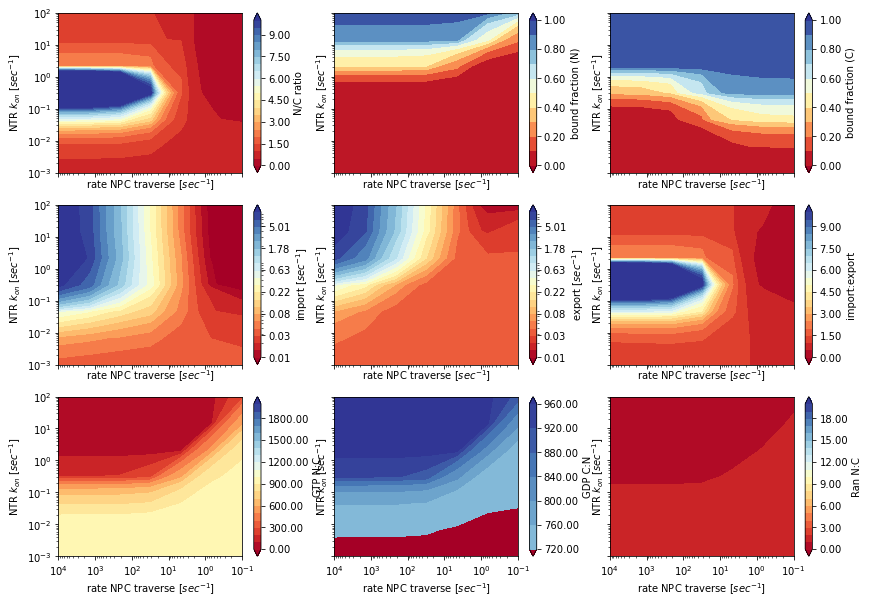

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=0 j=2 r=0.058332288647232944)
Finished some ten jobs (at i=4 j=6 r=0.03017812601925829)
Finished some ten jobs (at i=3 j=6 r=0.032805927163217286)
passive rate 0.02972362794946059 is force True
0.0 10.0


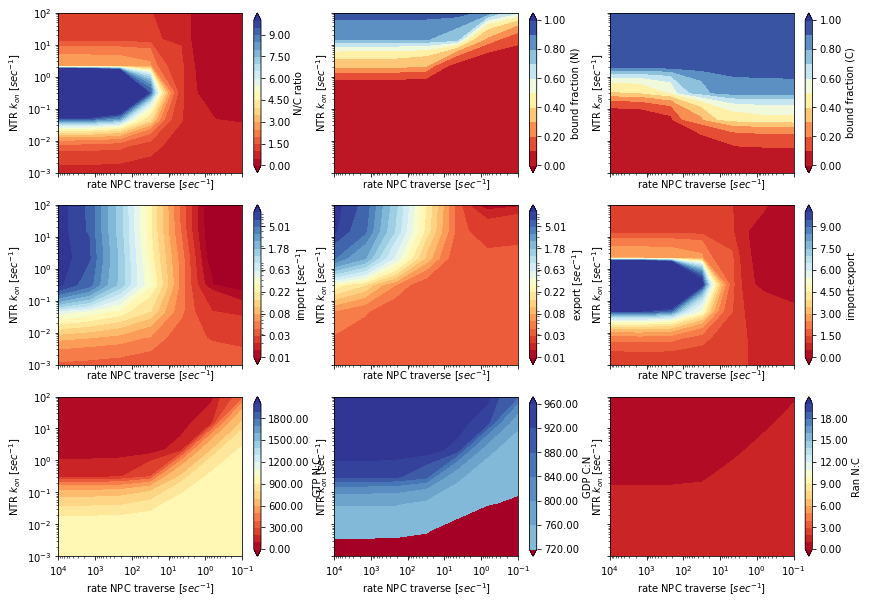

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=3 j=1 r=0.022383472125638182)
Finished some ten jobs (at i=4 j=1 r=0.045542947358596986)
Finished some ten jobs (at i=6 j=3 r=0.020129748813144666)
Finished some ten jobs (at i=6 j=5 r=0.0198156957946396)
passive rate 0.03902808756829234 is force False
0.0 10.0


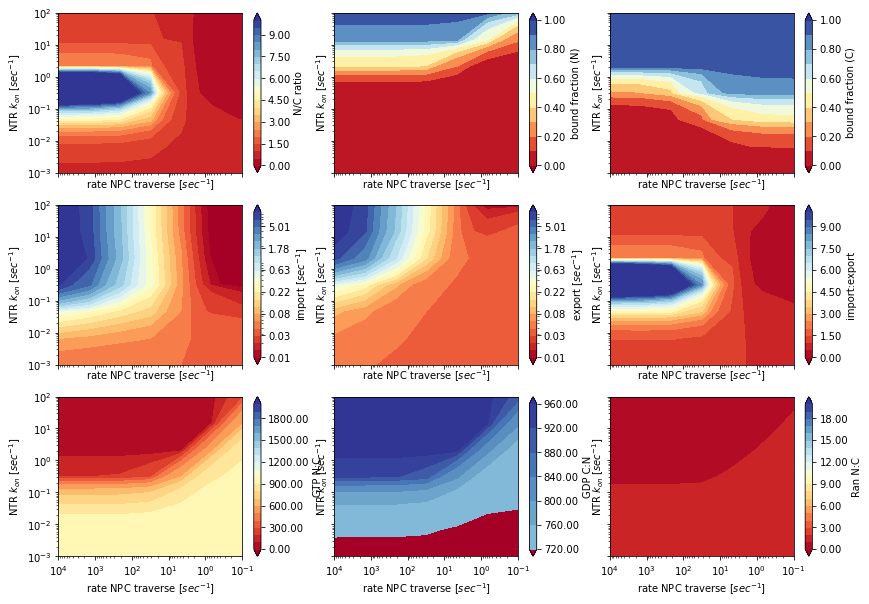

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=6 j=0 r=0.008986365808905217)
Finished some ten jobs (at i=2 j=4 r=0.008140087171575994)
passive rate 0.03902808756829234 is force True
0.0 10.0


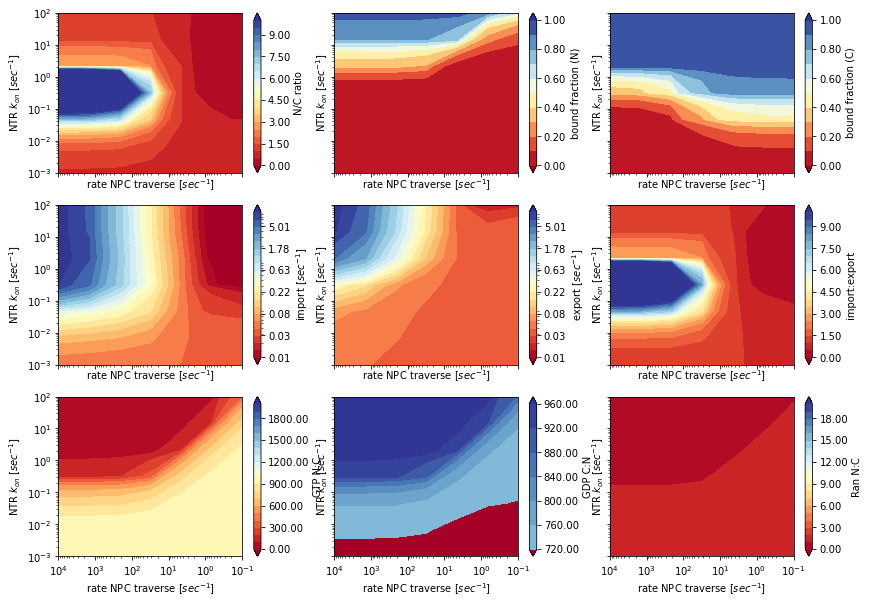

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=2 j=0 r=0.045692658698041955)
Finished some ten jobs (at i=2 j=1 r=0.002800097244680444)
Finished some ten jobs (at i=6 j=2 r=0.002351096438775846)
Finished some ten jobs (at i=5 j=3 r=0.011094830635461461)
Finished some ten jobs (at i=0 j=3 r=0.024949366489255054)
Finished some ten jobs (at i=4 j=5 r=0.031648817464656975)
passive rate 0.0512451448332012 is force False
0.0 10.0


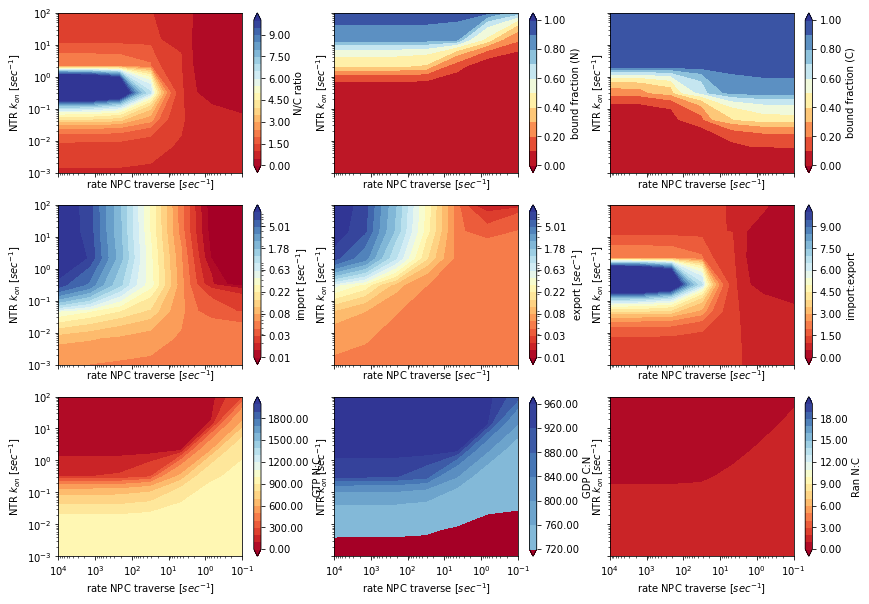

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=6 j=0 r=0.047525275790421095)
Finished some ten jobs (at i=0 j=1 r=0.0947605826664718)
Finished some ten jobs (at i=1 j=2 r=0.023143235262812922)
Finished some ten jobs (at i=6 j=1 r=0.0021341636752865156)
Finished some ten jobs (at i=6 j=3 r=0.01326122768932203)
Finished some ten jobs (at i=4 j=3 r=0.055138730255760326)
Finished some ten jobs (at i=0 j=5 r=0.04877120533867474)
Finished some ten jobs (at i=5 j=5 r=0.07656421312725792)
Finished some ten jobs (at i=3 j=6 r=0.037467586767988115)
Finished some ten jobs (at i=5 j=6 r=0.028794319066797303)
passive rate 0.0512451448332012 is force True
0.0 10.0


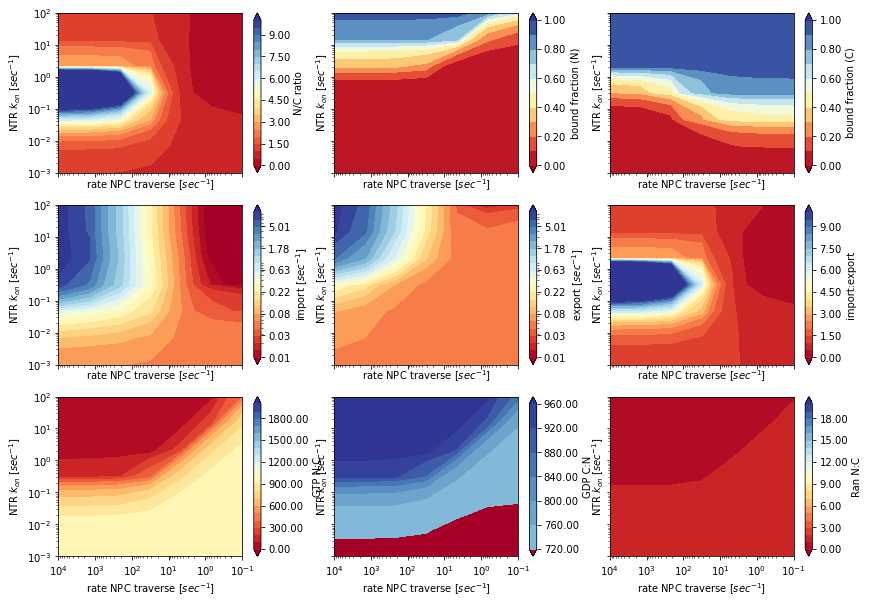

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=3 j=1 r=0.027950781982290507)
Finished some ten jobs (at i=1 j=5 r=0.0931013229537031)
passive rate 0.06728653727602237 is force False
0.0 10.0


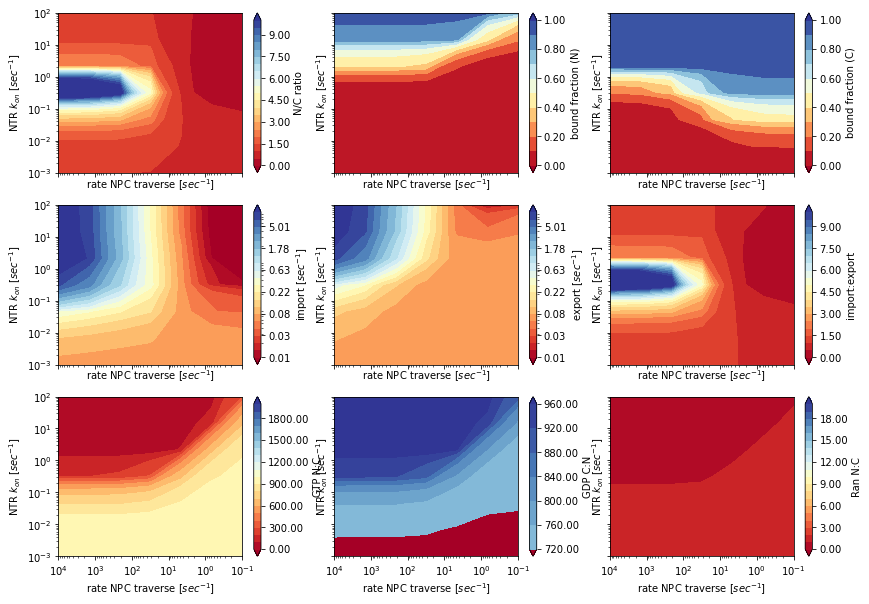

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=5 j=3 r=0.029333286048804696)
Finished some ten jobs (at i=6 j=4 r=0.0703069133384211)
Finished some ten jobs (at i=5 j=5 r=0.05378885849031456)
passive rate 0.06728653727602237 is force True
0.0 10.0


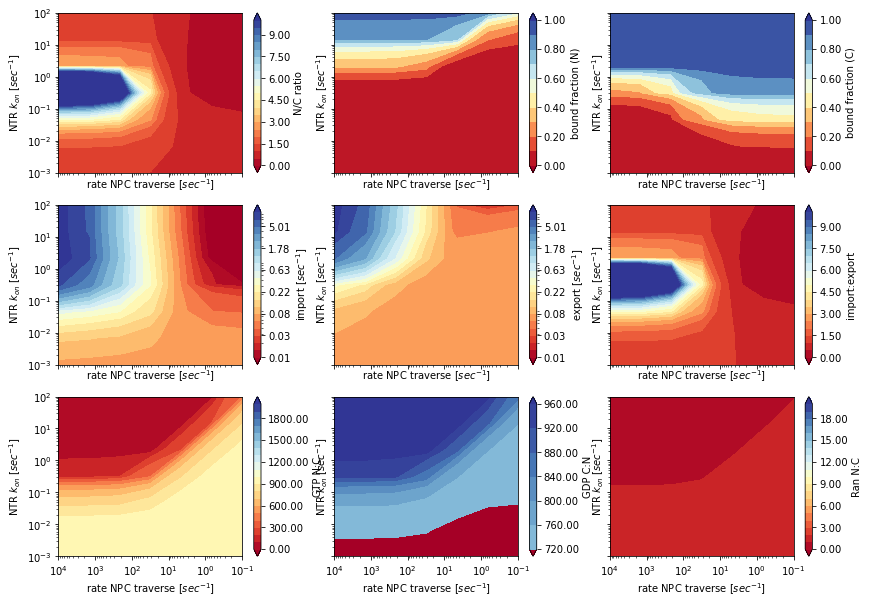

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=3 j=1 r=0.06315748861478665)
Finished some ten jobs (at i=0 j=1 r=0.008633855992037698)
Finished some ten jobs (at i=5 j=3 r=0.047915870462737487)
Finished some ten jobs (at i=5 j=5 r=0.00806621374104377)
Finished some ten jobs (at i=2 j=5 r=0.03421378242815343)
passive rate 0.08834940584779542 is force False
0.0 10.0


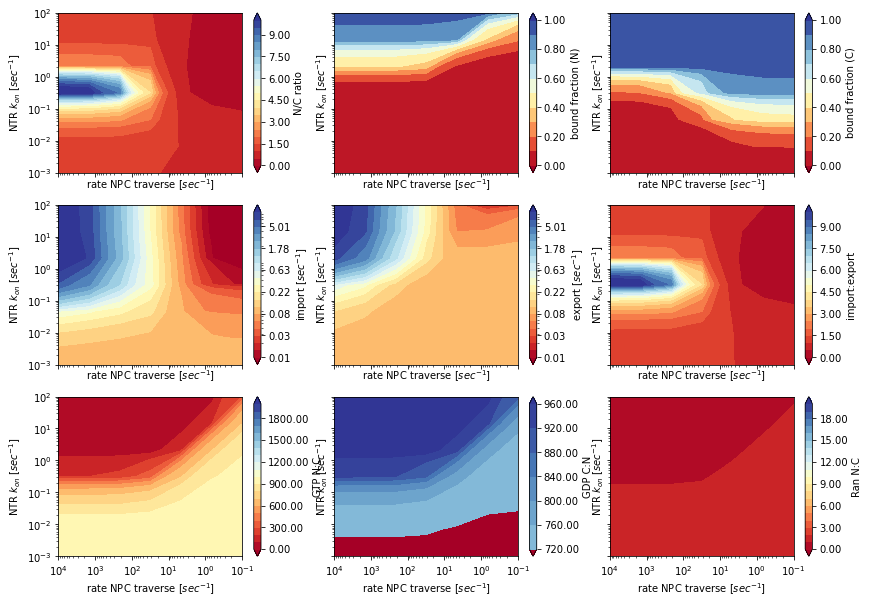

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=1 j=1 r=0.031111753936123865)
Finished some ten jobs (at i=5 j=1 r=0.0005236281811522581)
Finished some ten jobs (at i=6 j=1 r=0.00926889803469877)
Finished some ten jobs (at i=1 j=2 r=0.052977763324197125)
Finished some ten jobs (at i=6 j=2 r=0.0001244786117025054)
Finished some ten jobs (at i=5 j=3 r=0.09650441993734948)
Finished some ten jobs (at i=2 j=6 r=0.06058540448084848)
Finished some ten jobs (at i=2 j=5 r=0.059379618289710834)
passive rate 0.08834940584779542 is force True
0.0 10.0


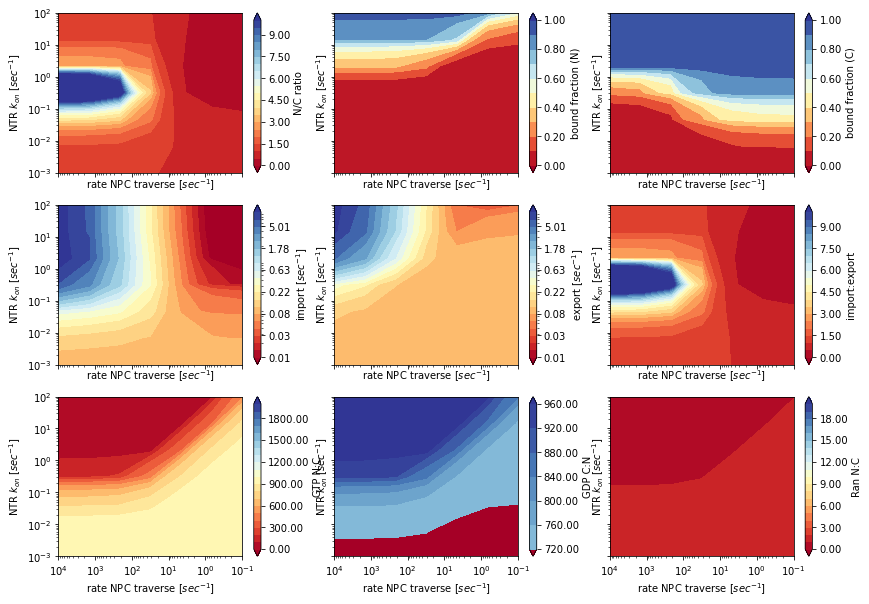

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=2 j=2 r=0.028040530519032103)
Finished some ten jobs (at i=2 j=1 r=0.0005614686349221243)
Finished some ten jobs (at i=5 j=0 r=0.09752009227948588)
Finished some ten jobs (at i=2 j=4 r=0.05644166680532903)
Finished some ten jobs (at i=0 j=4 r=0.044308662664185205)
Finished some ten jobs (at i=4 j=4 r=0.07870217533067803)
passive rate 0.1160056354458889 is force False
0.0 10.0


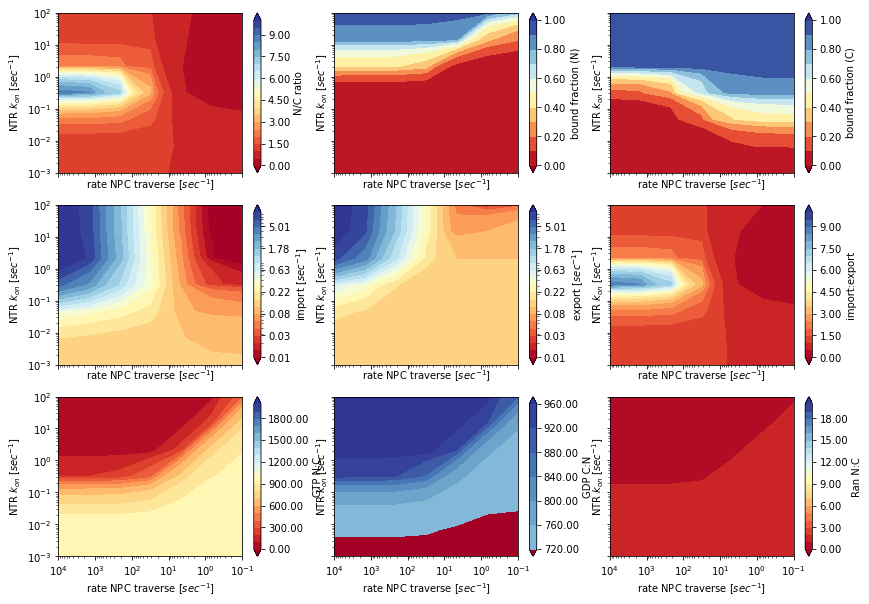

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=1 j=1 r=0.07661677989041293)
Finished some ten jobs (at i=4 j=1 r=0.07104777248095262)
Finished some ten jobs (at i=6 j=1 r=0.09564121261243153)
Finished some ten jobs (at i=2 j=3 r=0.06094333914331018)
Finished some ten jobs (at i=6 j=5 r=0.08846215353366815)
Finished some ten jobs (at i=1 j=6 r=0.002412829571204367)
passive rate 0.1160056354458889 is force True
0.0 10.0


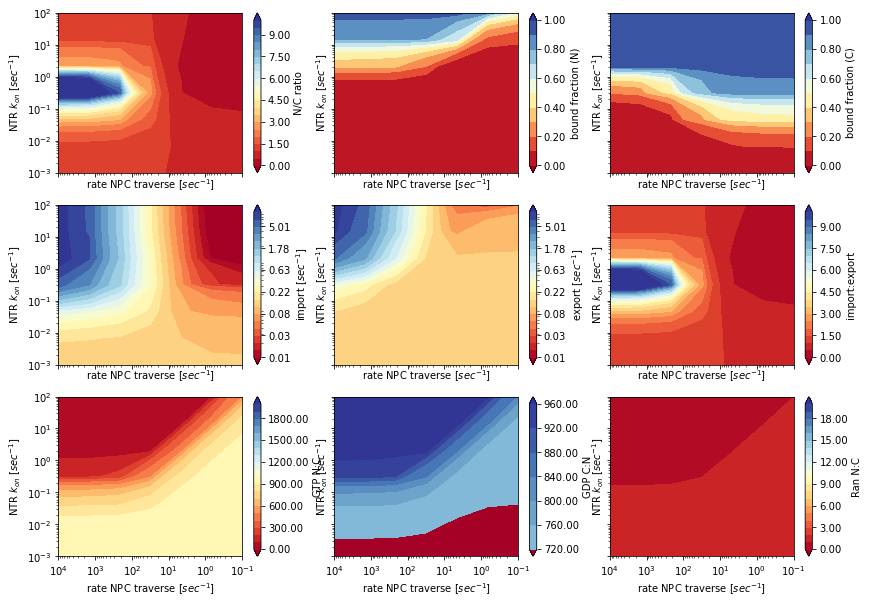

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=4 j=0 r=0.010318863146333568)
Finished some ten jobs (at i=6 j=0 r=0.05995076508637376)
Finished some ten jobs (at i=0 j=2 r=0.07719313808744777)
Finished some ten jobs (at i=3 j=3 r=0.07592474887927436)
Finished some ten jobs (at i=5 j=2 r=0.04692806006575623)
Finished some ten jobs (at i=5 j=5 r=0.09298840676286924)
Finished some ten jobs (at i=2 j=6 r=0.04287596790481141)
passive rate 0.15231916192382952 is force False
0.0 10.0


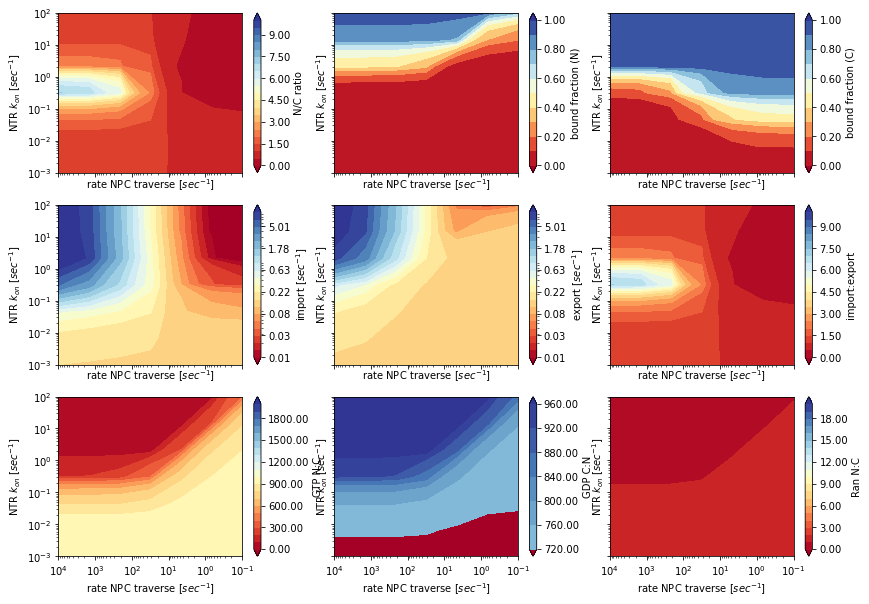

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=5 j=1 r=0.0416304713200224)
Finished some ten jobs (at i=0 j=6 r=0.04921222196204633)
Finished some ten jobs (at i=5 j=6 r=0.05818193884194989)
passive rate 0.15231916192382952 is force True
0.0 10.0


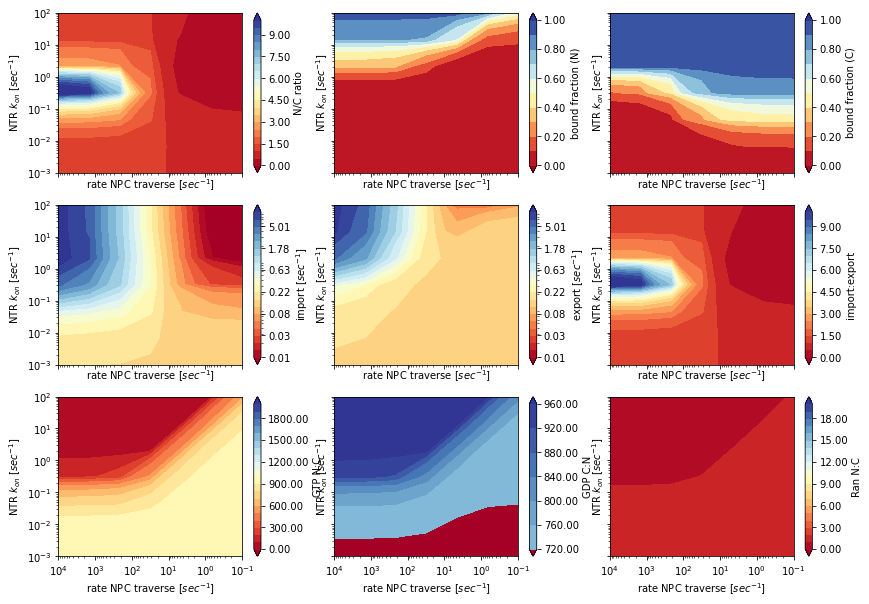

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=2 j=0 r=0.09981373250532355)
Finished some ten jobs (at i=4 j=3 r=0.029087581515075955)
passive rate 0.20000000000000004 is force False
0.0 10.0


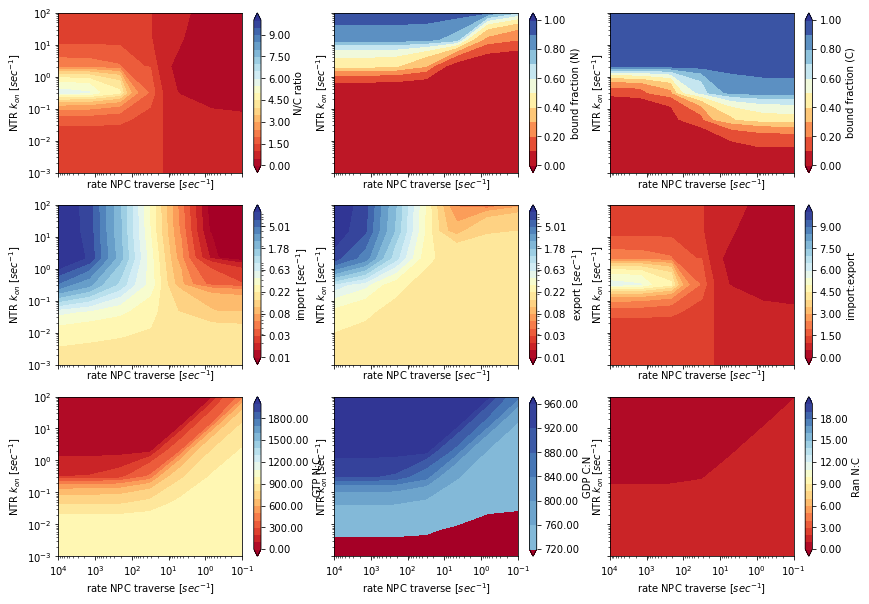

Param fraction_complex_NPC_traverse_per_sec default value is 4000
Param rate_free_to_complex_per_sec default value is 0.01
njobs=49
Finished some ten jobs (at i=5 j=1 r=0.09208104782771342)
Finished some ten jobs (at i=2 j=0 r=0.08018909497371685)
Finished some ten jobs (at i=4 j=1 r=0.0586917462799057)
Finished some ten jobs (at i=4 j=2 r=0.06726836835257333)
Finished some ten jobs (at i=4 j=4 r=0.0632774967911569)
Finished some ten jobs (at i=6 j=3 r=0.03536283201501056)
Finished some ten jobs (at i=1 j=4 r=0.07534959180566891)
passive rate 0.20000000000000004 is force True
0.0 10.0


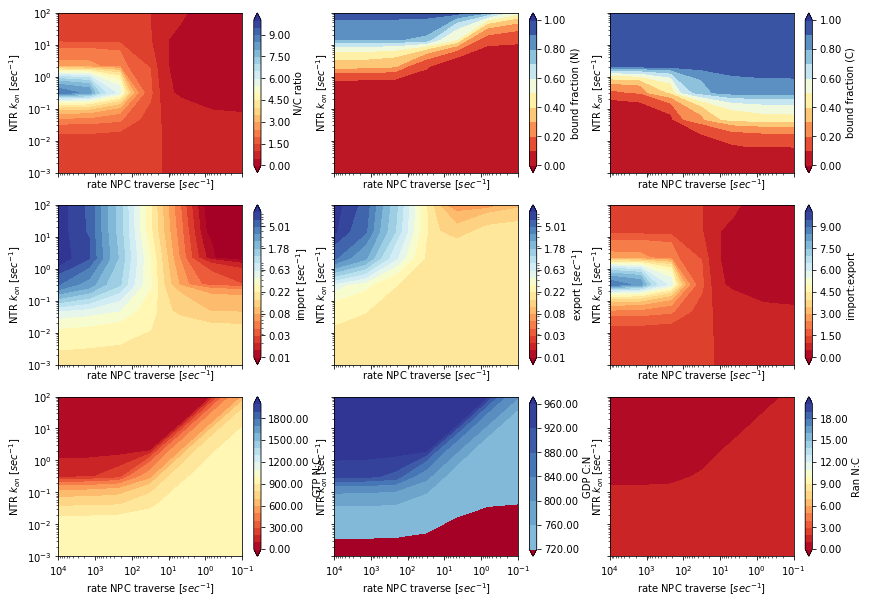

In [18]:
param_range= get_param_range_traverse_kon(nx= 7, ny= 7)
print(param_range)
n_processors= multiprocessing.cpu_count()
if True:
    stats_grids_traverse_by_passive_force= {}
    ts_traverse_by_passive_force= {}
for passive in np.logspace(np.log10(0.01), np.log10(0.2), 12): #0.01,0.09,6):
    for is_force in [False, True]:
#        if is_force:
#            continue
        def transport_simulation_generator(**kwargs):
            return get_transport_simulation_by_passive(passive_nuclear_molar_rate_per_sec= passive, 
                                                       is_force= is_force,
                                                       **kwargs)
        key= (passive, is_force)
        stats_grids_traverse_by_passive_force[key], \
        ts_traverse_by_passive_force[key] = \
            map_param_grid.map_param_grid_parallel( param_range,
                                                equilibration_time_sec= 40.0,
                                                n_processors= n_processors-3,
                                        transport_simulation_generator= transport_simulation_generator)
        print(f"passive rate {passive} is force {is_force}")
        plot_stats_grids(stats_grids_traverse_by_passive_force[key],
                    ts_traverse_by_passive_force[key])

passive rate 0.01 is force False
0.0 10.0


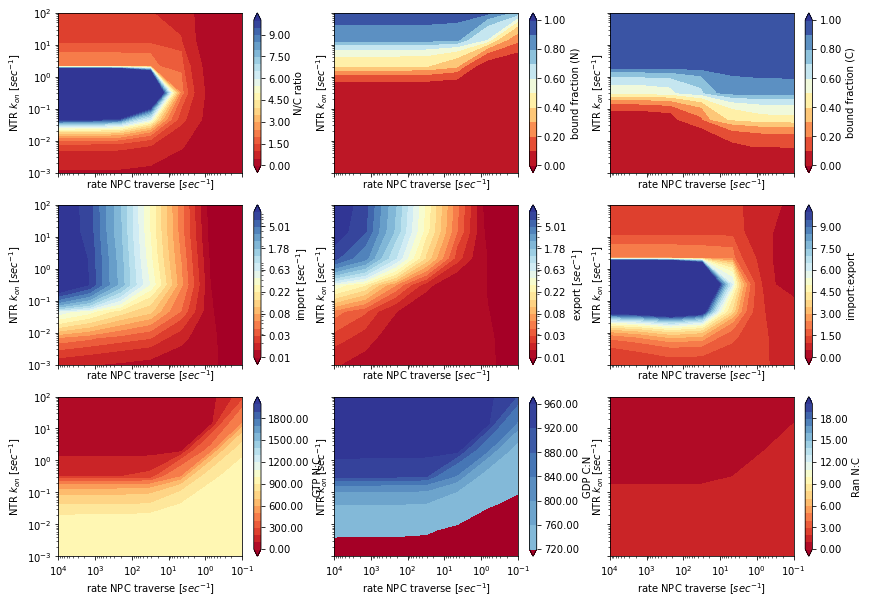

passive rate 0.013130324344878838 is force False
0.0 10.0


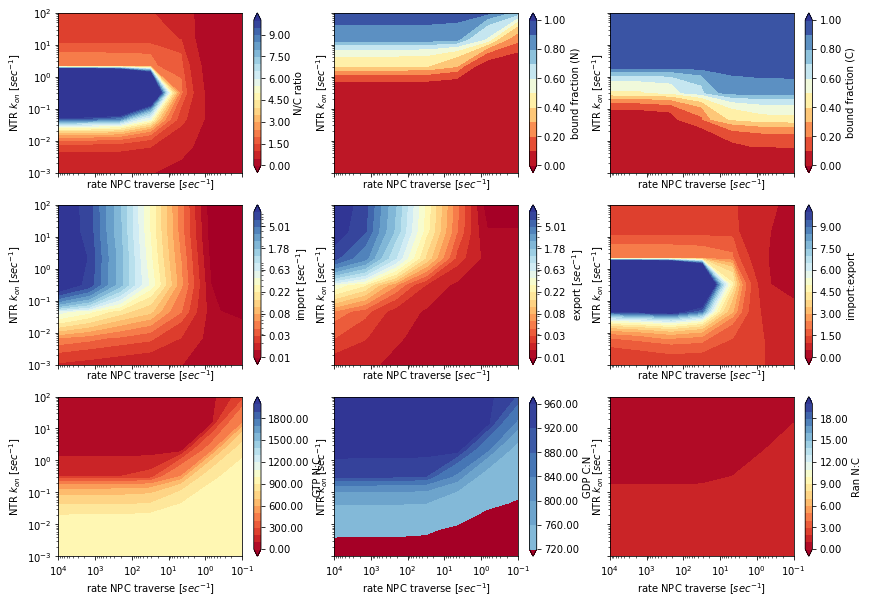

passive rate 0.017240541740171793 is force False
0.0 10.0


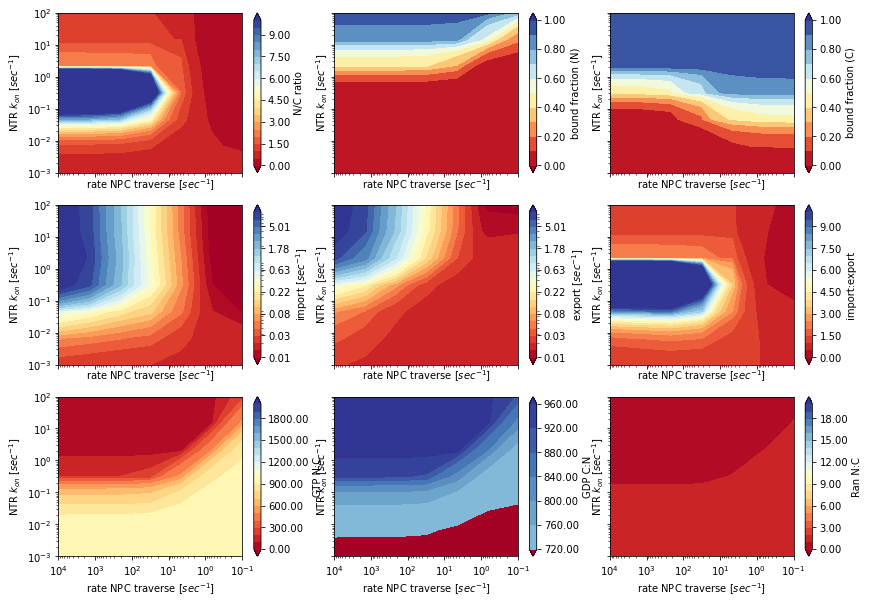

passive rate 0.022637390492987748 is force False
0.0 10.0


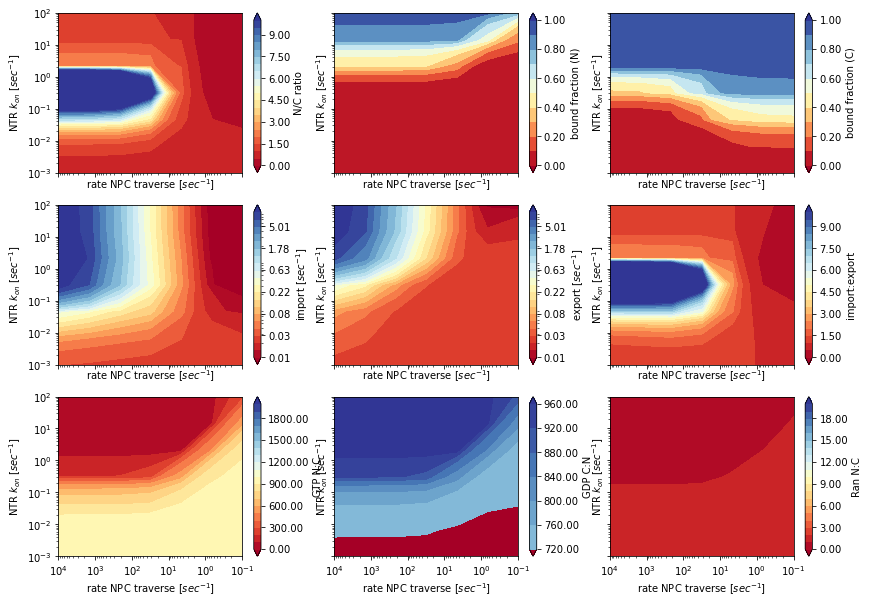

passive rate 0.02972362794946059 is force False
0.0 10.0


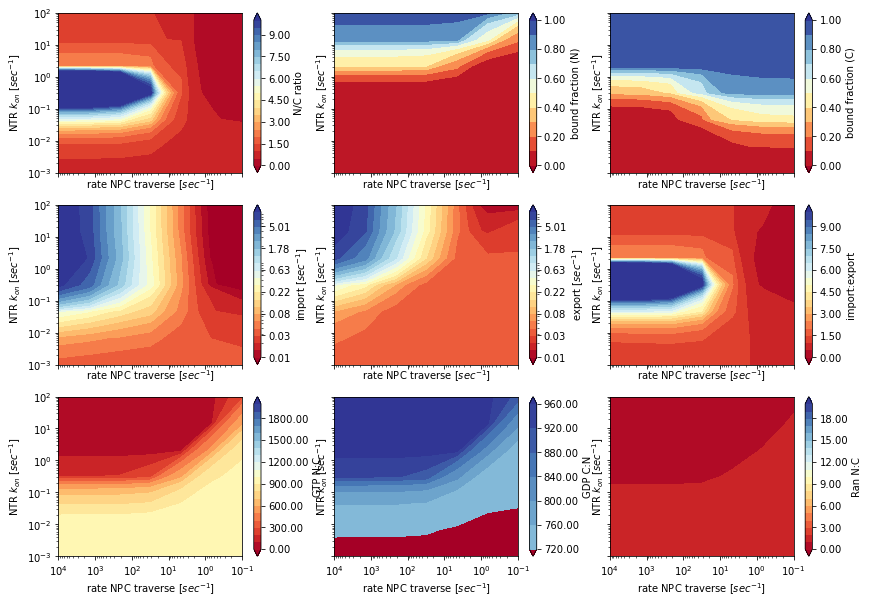

passive rate 0.03902808756829234 is force False
0.0 10.0


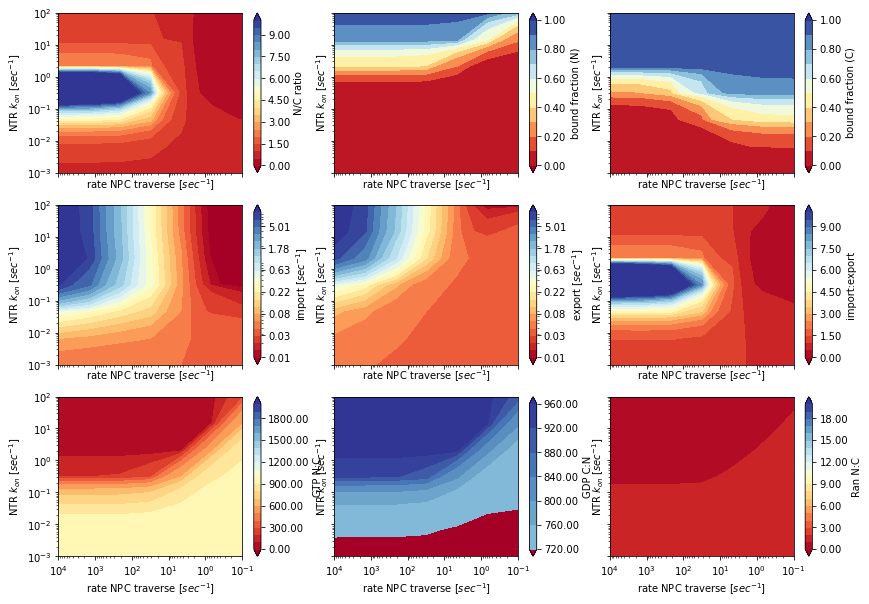

passive rate 0.0512451448332012 is force False
0.0 10.0


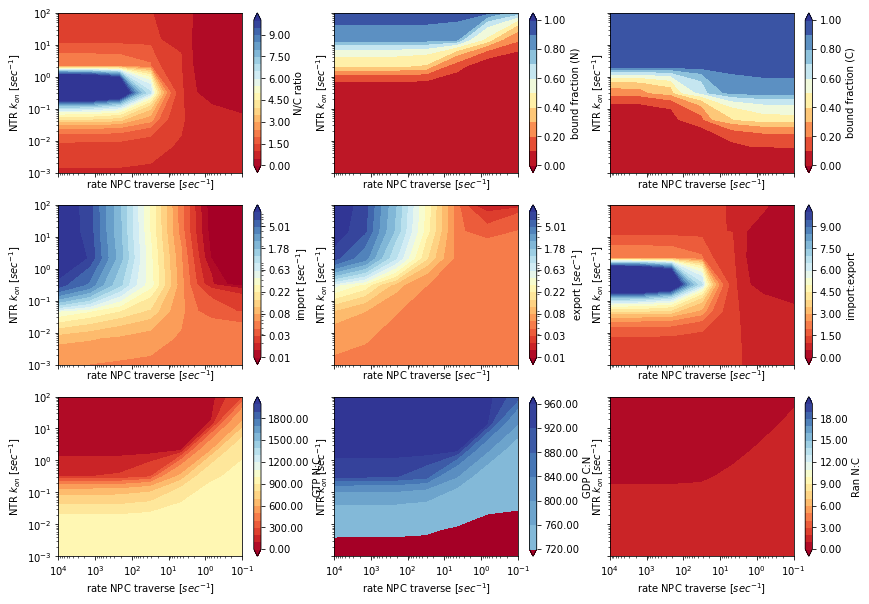

passive rate 0.06728653727602237 is force False
0.0 10.0


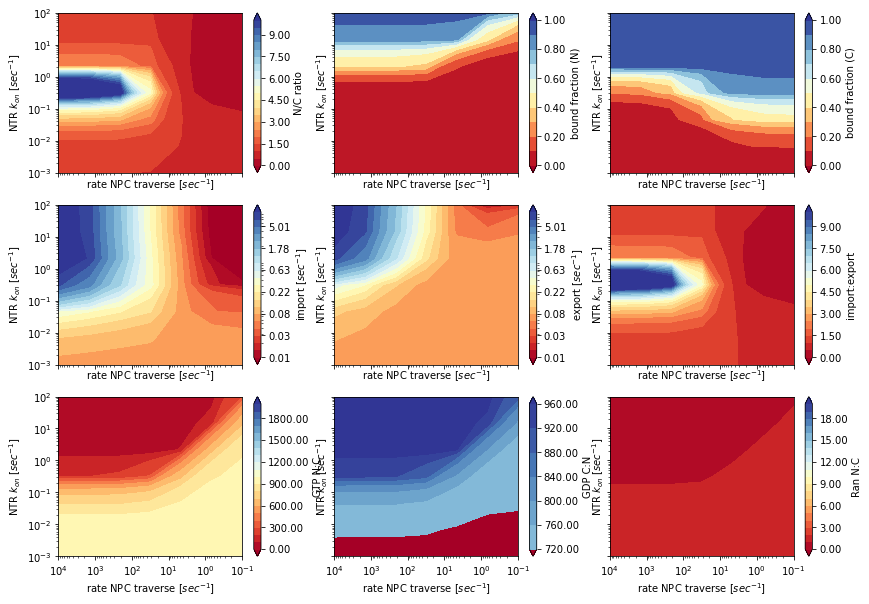

passive rate 0.08834940584779542 is force False
0.0 10.0


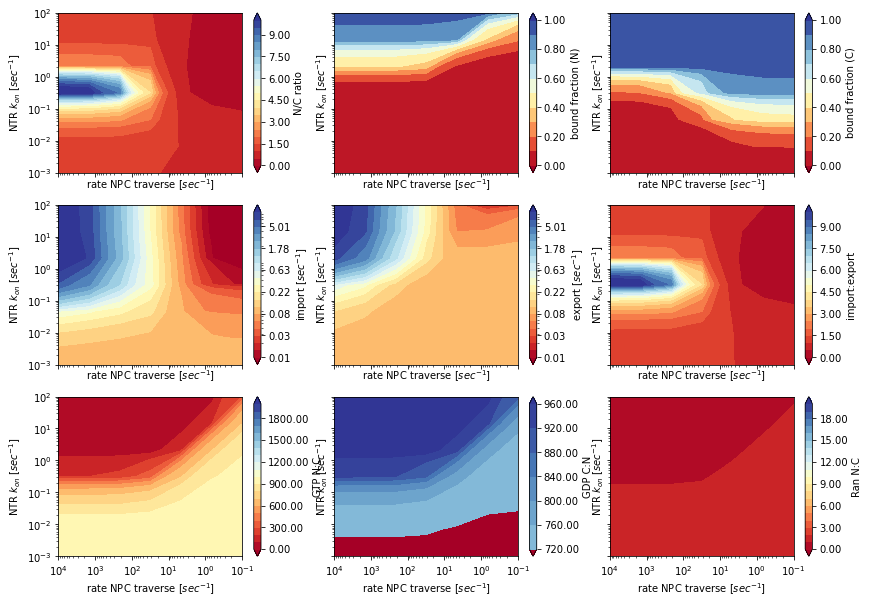

passive rate 0.1160056354458889 is force False
0.0 10.0


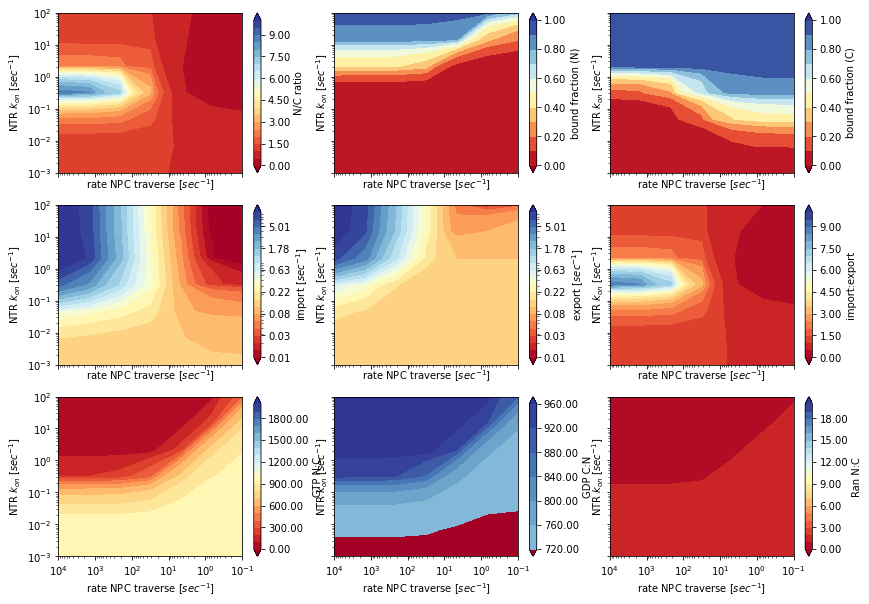

passive rate 0.15231916192382952 is force False
0.0 10.0


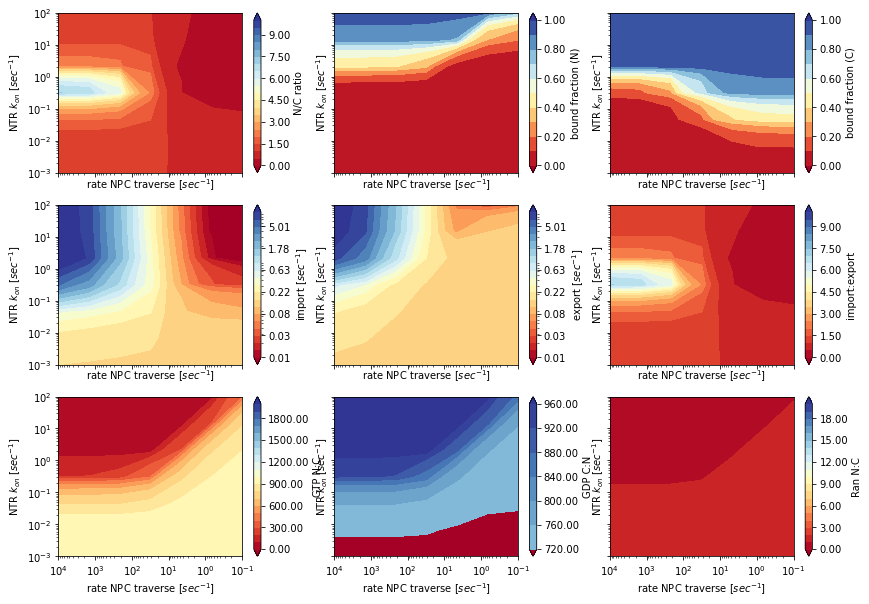

passive rate 0.20000000000000004 is force False
0.0 10.0


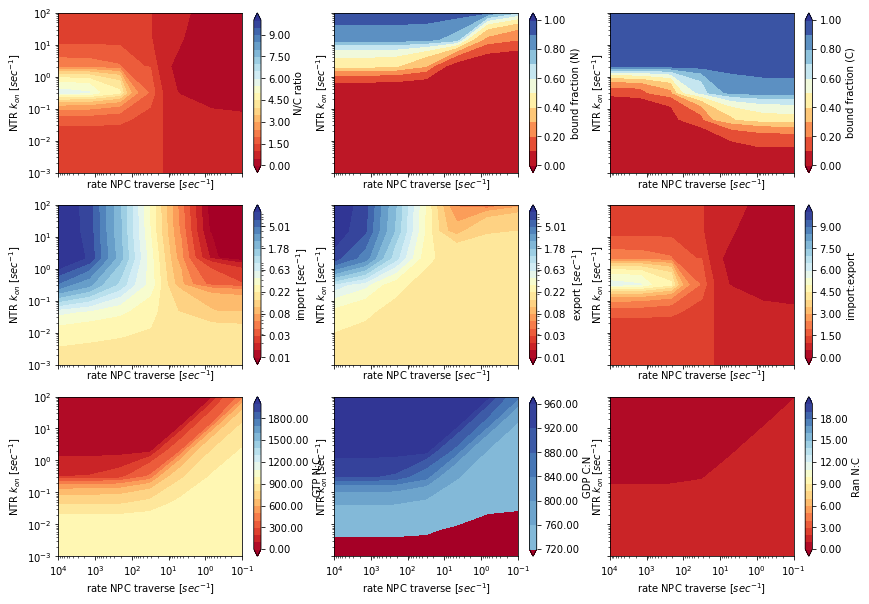

In [27]:
keys= sorted(stats_grids_traverse_by_passive_force.keys(), key=lambda x: (x[0],x[1]))
for key in keys:
    if key[1]:
        continue
    print(f"passive rate {key[0]} is force {key[1]}")
    plot_stats_grids(stats_grids_traverse_by_passive_force[key],
                    ts_traverse_by_passive_force[key],
                    vmax_import_export= 10.0)

In [20]:
print("hi")

hi


# Map NLS strength, MW size, force

In [21]:
import importlib
import transport_simulation
from transport_simulation import TransportSimulation
importlib.reload(transport_simulation)
import transport_simulation
from transport_simulation import TransportSimulation

import numpy as np
import transport_simulation

def get_ts_with_parameters(MW= 27, 
                      NLS_strength= 0, 
                      is_force= False, 
                      **kwargs):
    if is_force:
        v_N_L=762e-15
        v_C_L=4768e-15
    else:
        v_N_L=627e-15
        v_C_L=2194e-15    
    ts= transport_simulation.TransportSimulation(v_N_L= v_N_L,
                                                v_C_L= v_C_L)
    ts.set_time_step(0.1e-3)
    ts.set_NPC_dock_sites(n_NPCs= 2000, 
                        n_dock_sites_per_NPC= 500)
    ts.fraction_complex_NPC_to_free_N_per_M_GTP_per_sec = 1.0e+6 # TODO: this is doubled relative to complex_N to free_N
    ts.fraction_complex_N_to_free_N_per_M_GTP_per_sec = 1.0e+6
    ts.rate_complex_to_NPC_per_free_site_per_sec_per_M= 50e+6
    ts.fraction_complex_NPC_to_complex_N_C_per_sec= 3000.0 # Leakage parameter
    ts.rate_GDP_N_to_GTP_N_per_sec= 1000.0
    ts.rate_GTP_N_to_GDP_N_per_sec= 0.2
    ts.rate_GTP_C_to_GDP_C_per_sec= 500.0
    ts.rate_GTP_N_to_GTP_C_per_sec = 0.5
    ts.rate_GDP_C_to_GDP_N_per_sec = 1.0
    ts.rate_GDP_N_to_GDP_C_per_sec = 1.0 
    ts.rate_complex_to_free_per_sec = 0.05
    #
    ts.set_passive_nuclear_molar_rate_per_sec(
        get_passive_nuclear_molar_rate_per_sec(MW, is_force))
    ts.set_params(rate_free_to_complex_per_sec= 
                  get_free_to_complex_rate(NLS_strength))
    ts.set_params(fraction_complex_NPC_traverse_per_sec=
                  get_fraction_complex_NPC_traverse_per_sec(MW, is_force))
    #
    ts.set_params(**kwargs) # override defaults
    return ts

def get_free_to_complex_rate(NLS_strength):
    rates = [0.0,
             0.001,
             0.00316,
             0.01,
             0.02, #2.11
             0.045, #2.11
             0.1,  #16.4
             0.2,
             0.45,
             1.0,
             2.0,
             4.5
            ]
    return rates[NLS_strength]

def get_passive_nuclear_molar_rate_per_sec(MW, is_force): # TODO: verify it corresponds to multiplyng by concentration rather than nmolecules
    #TODO: generalize this - either from the literature or regression
    base_rates={ 27:0.0805618, 
                41:0.06022355, 
                54:0.03301662, 
                67:0.0287649 }
    rate= base_rates[MW]
    if is_force:
        rate += get_force_effect_on_diffusion(MW)
    return rate

def get_force_effect_on_diffusion(MW):
    """
    The effect of force on passive diffusion as measured by experiment
    """
    effects = {27:0.08214946, 
                41:0.03027974, 
                54:0.00026308, 
                67:0.00272423 }
    return effects[MW]

def get_fraction_complex_NPC_traverse_per_sec(MW, is_force):
    s= 20.0
    rate= { 27: [s*3.0,  s*10.0],
            41: [s*3.0,  s*10.0],
            54: [s*3.0, s*10.0],
            67: [s*3.0,  s*10.0] }
    i_force= 1 if is_force else 0
    return rate[MW][i_force]


Registering <function TransportSimulation.get_free_N_to_free_C at 0x7fea51a15840>
Registering <function TransportSimulation.get_nmol_GDP_C_to_GDP_N at 0x7fea51a15620>
Registering <function TransportSimulation.get_nmol_GDP_N_to_GTP_N at 0x7fea51a15488>
Registering <function TransportSimulation.get_nmol_GTP_C_to_GDP_C at 0x7fea51a15510>
Registering <function TransportSimulation.get_nmol_GTP_N_to_GTP_C at 0x7fea51a15598>
Registering <function TransportSimulation.get_nmol_cargo_bleached at 0x7fea51a15a60>
Registering <function TransportSimulation.get_nmol_complex_C_to_free_C at 0x7fea51a156a8>
Registering <function TransportSimulation.get_nmol_complex_NPC_to_complex_N_C at 0x7fea51a159d8>
Registering <function TransportSimulation.get_nmol_complex_NPC_to_free_N at 0x7fea51a15378>
Registering <function TransportSimulation.get_nmol_complex_NPC_traverse at 0x7fea51a15950>
Registering <function TransportSimulation.get_nmol_complex_N_C_to_complex_NPC at 0x7fea51a158c8>
Registering <function Tran

In [22]:
def get_compartment_nmol_stats(ts, 
                               stats, 
                               compartment,
                              labels= ['L', 'U']):
    assert(compartment in ['N','C', 'NPC'])
    nframes= len(stats['time_sec'])
    nmol_stats= np.zeros(nframes)
    if compartment=='NPC':
        for label in labels:
            for side in ['N', 'C']:
                for source in ['import', 'export']:
                    tag= 'complex{}_NPC_{}_{}'.format(label,
                                                     side,
                                                     source)
                    nmol_stats = nmol_stats + stats[tag]
    else:
        for state in ['free','complex']:
            for label in labels:
                tag= '{}{}_{}'.format(state, 
                                      label, 
                                      compartment)
                nmol_stats = nmol_stats + stats[tag]
    return nmol_stats

def get_compartment_concentration_stats(ts, 
                                        stats, 
                                        compartment, 
                                       labels= ['L', 'U']):
    assert(compartment in ['N','C'])
    nmol_stats= get_compartment_nmol_stats(ts, 
                                           stats, 
                                           compartment,
                                           labels)
    is_nuclear= (compartment=='N')
    volume_L= (ts.get_v_N_L() if is_nuclear else ts.get_v_C_L())
    return (nmol_stats/transport_simulation.N_A)/volume_L

def get_N_C_ratio_stats(ts, 
                        stats,
                        labels= ['L','U']):
    EPSILON= 1E-12
    c_N_stats= get_compartment_concentration_stats(ts, 
                                                   stats, 
                                                   'N')
    c_C_stats= get_compartment_concentration_stats(ts, 
                                                   stats, 
                                                   'C')
    return c_N_stats/c_C_stats

In [23]:
import matplotlib.pyplot as plt
import multiprocessing



def do_simulate(ts, simulation_time_sec):
    return ts.simulate(simulation_time_sec)

def get_MW_stats_list_by_force(MW, simulation_time_sec,
                              n_processors):
    assert(MW in [27,41, 54, 67])
    stats_list_by_force= {}
    TSs_by_force= {}
    for is_force in [False, True]:
        TS_tuples= []
        for i_NLS in range(9):
            ts = get_ts_with_parameters(MW= MW,
                                    NLS_strength=i_NLS,
                                  is_force= is_force)
            TS_tuples.append((ts, simulation_time_sec))
        pool= multiprocessing.Pool(processes= n_processors)
        stats_list_by_force[is_force]= pool.starmap(do_simulate,
                                                    TS_tuples)
        TSs_by_force[is_force]= [x[0] for x in TS_tuples]
        print(f"Is force {is_force} i_NLS {i_NLS}: OK")
    return (stats_list_by_force, TSs_by_force)



In [24]:

def plot_MW_stats_list(stats_list_by_force, TSs_by_force):
    plot_from_sec=  0.1 # ts.bleach_start_time_sec + 1.0
    extras= [#'GTP_N',
            #'GDP_N',
            #'GTP_C',
            #'GDP_C',
            #'complexL_C',
            #'freeL_C',
            #'complexL_N',
            #'freeL_N'
    ]
    fig, ax_grid= plt.subplots(7+len(extras), 3, 
                               figsize=(15,
                                        40.0 + 5.0*len(extras)), 
                               sharex= False, sharey=False)
    n_NLS= len(stats_list_by_force[False])
    assert(n_NLS == len(stats_list_by_force[True]))
    ratios= np.ones(shape=(7+len(extras), n_NLS))
    ax_grid= ax_grid.transpose()
    for axes, is_force in zip(ax_grid[0:2,:], [False, True]):  
        for i_NLS, stats in enumerate(stats_list_by_force[is_force]):
            ts= TSs_by_force[is_force][i_NLS]
            labels= ['L', 'U']
            x= stats['time_sec']
            ys={}
            ys[0]= stats['nuclear_importL_per_sec'] + stats['nuclear_importU_per_sec']
            ys[1]= stats['nuclear_exportL_per_sec'] + stats['nuclear_exportU_per_sec']
            ys[2]= get_N_C_ratio_stats(ts,
                                       stats, 
                                       labels)
            ys[3]= get_compartment_concentration_stats(ts, 
                                                      stats, 
                                                      'C', 
                                                      labels)
            ys[4]= get_compartment_concentration_stats(ts, 
                                                      stats, 
                                                      'N', 
                                                      labels)
            ys[5]= ys[3] - ys[4]
            ys[6]= stats['complexL_NPC_N_import']+stats['complexL_NPC_C_import']+stats['complexL_NPC_N_export']+stats['complexL_NPC_C_export'] \
                + stats['complexU_NPC_C_import']+stats['complexU_NPC_C_import']+stats['complexU_NPC_N_export']+stats['complexU_NPC_C_export'] 
            for iextra, extra in enumerate(extras):
                ys[7+iextra]= stats[extra]
            plot_from_frame= int(plot_from_sec/ts.dt_sec) 
            for i_row, ax in enumerate(axes):
                ax.plot(x[plot_from_frame:], 
                        ys[i_row][plot_from_frame:],
                        label= get_free_to_complex_rate(i_NLS))  
                ax.set_xlabel(r"time [$sec$]")           
                if is_force:
                   ratios[i_row, i_NLS] *= ys[i_row][-1]
                else:
                   ratios[i_row, i_NLS] /= ys[i_row][-1]
            axes[0].set_ylabel(r"import rate [$sec^{-1}$]")
            axes[0].set_ylim([0.01,0.3])
            #axes[0].set_yscale('log')
            axes[1].set_ylabel(r"export rate [$sec^{-1}$]")
            axes[1].set_ylim([0.01,0.3])
            #axes[1].set_yscale('log')
            axes[2].set_ylabel("N/C ratio")
            axes[2].set_ylim([0,7.0])
            axes[3].set_ylabel(r"C [$M$]")
            axes[3].set_yscale('log')
            axes[4].set_ylabel(r"N [$M$]")
            axes[4].set_yscale('log')
            axes[5].set_ylabel(r"$\Delta$(C,N) [$M$]")
            axes[5].set_yscale('symlog', linthreshy=1e-9)
            axes[6].set_ylabel('NPC [nmol]')
            for iextra, extra in enumerate(extras):
                axes[7+iextra].set_ylabel(extra)
                axes[7+iextra].set_yscale('log')
            title= "30 kPa" if is_force else "5 kPa"
            axes[0].set_title(title)
            
    NLSs= [get_free_to_complex_rate(i_NLS) for i_NLS in range(ratios.shape[1])]
    ax_grid[2,0].set_title("Mechanosensitivity")
    for i_row, ax in enumerate(ax_grid[2,:]):
       ax.bar(range(len(NLSs)),
              ratios[i_row,:],
               width=0.8,
             tick_label= NLSs)
       ax.set_xlabel('NLS strength')
            
    handles, labels = ax_grid[0,0].get_legend_handles_labels()
    lh= fig.legend(handles, labels, loc='center left')
    lh.set_title('NLS strength')

        


27
Is force False i_NLS 8: OK
Is force True i_NLS 8: OK


/Users/Admin/Public/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in double_scalars
/Users/Admin/Public/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars


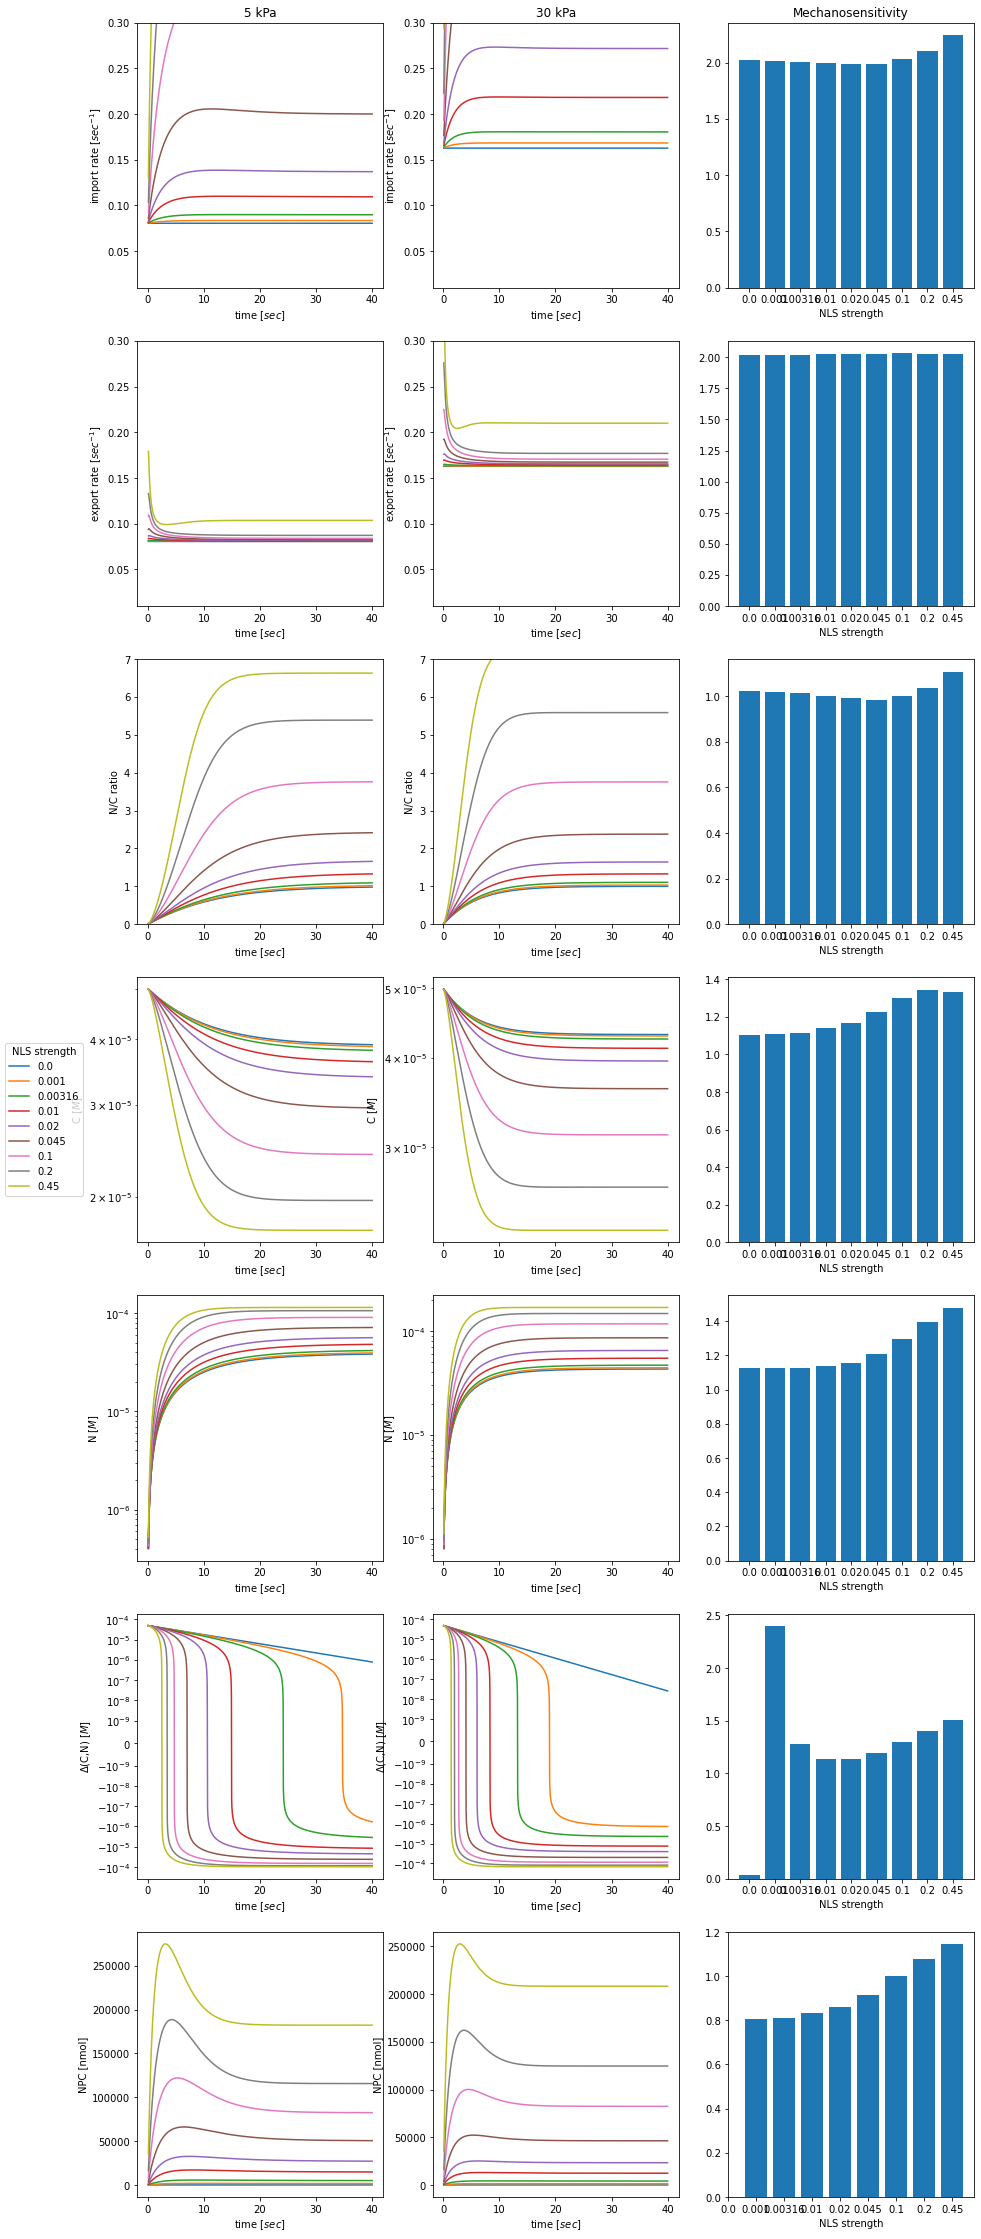

41
Is force False i_NLS 8: OK
Is force True i_NLS 8: OK


/Users/Admin/Public/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in double_scalars
/Users/Admin/Public/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars


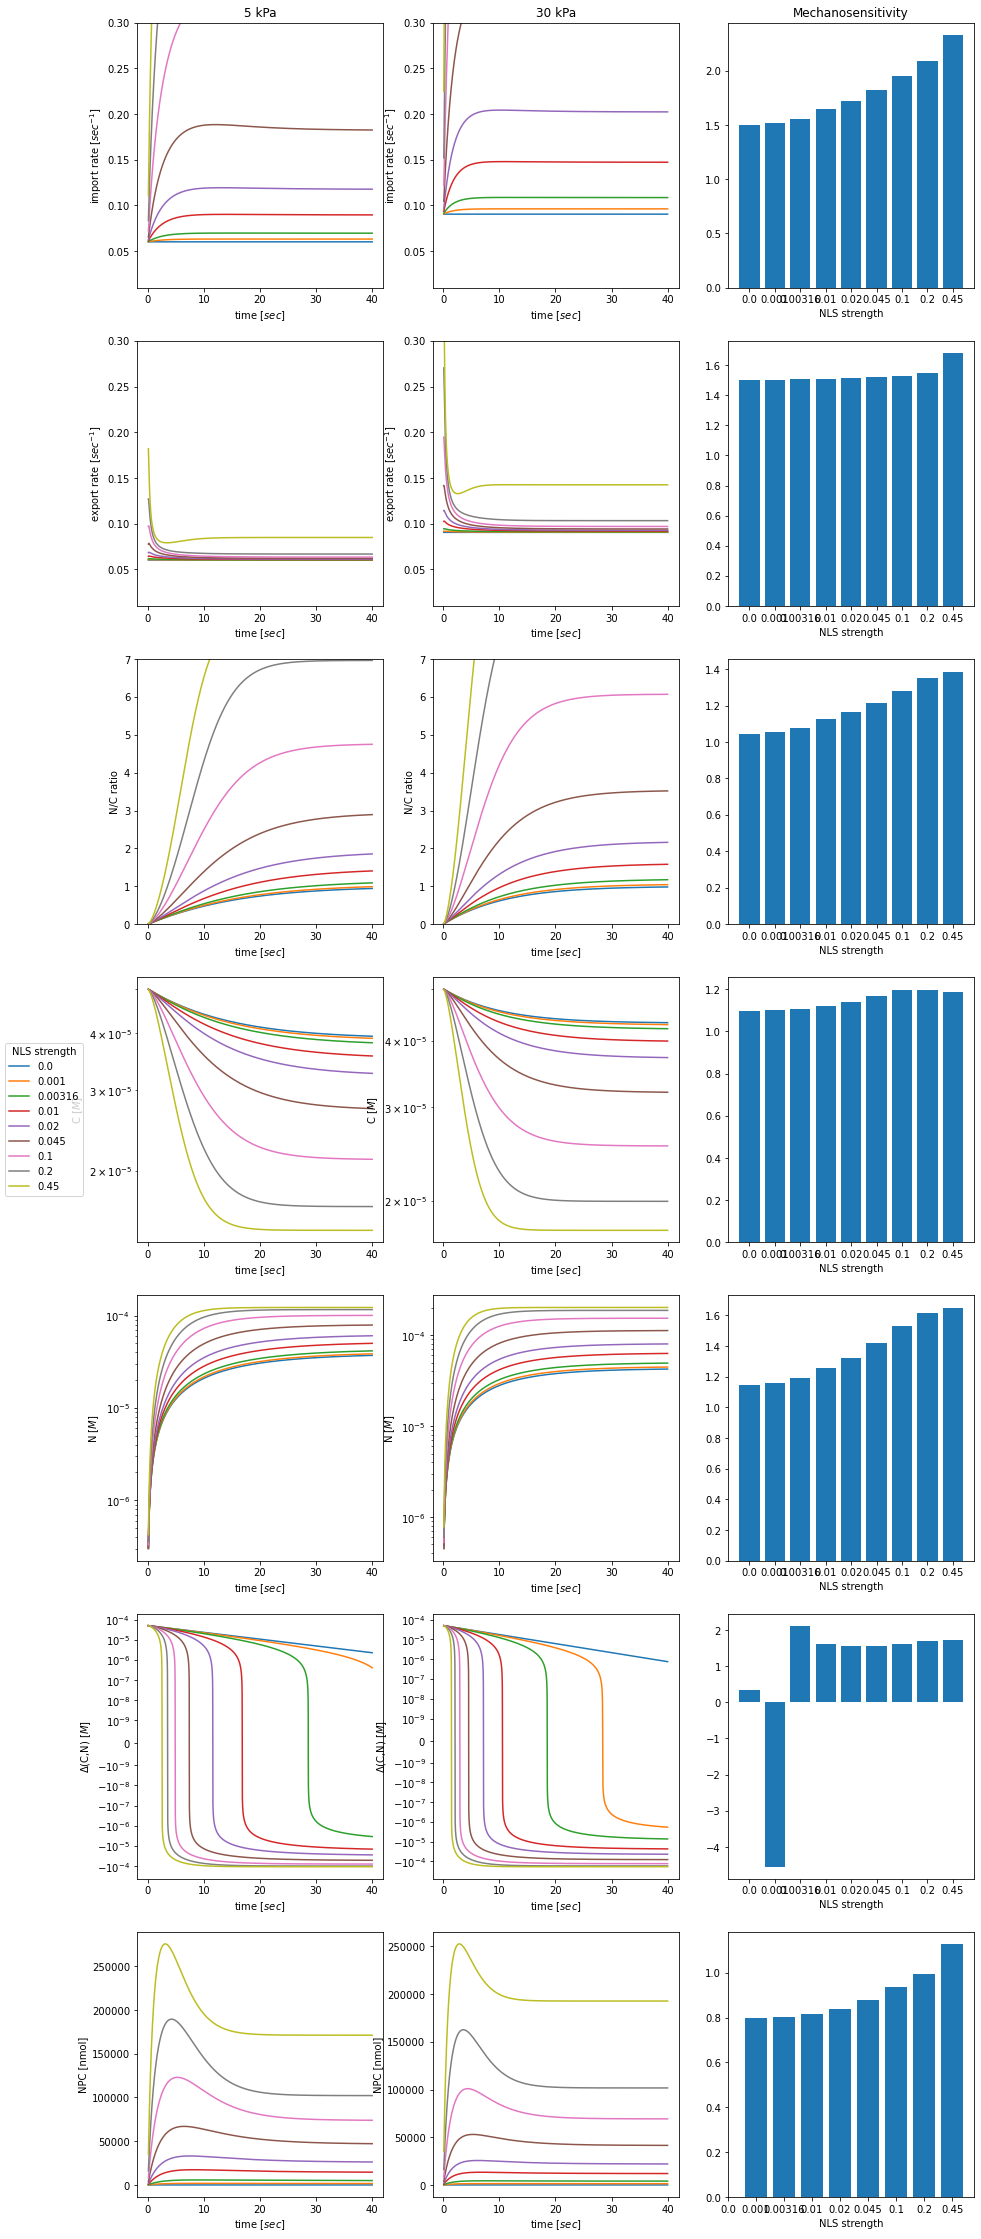

54
Is force False i_NLS 8: OK
Is force True i_NLS 8: OK


/Users/Admin/Public/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in double_scalars
/Users/Admin/Public/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars


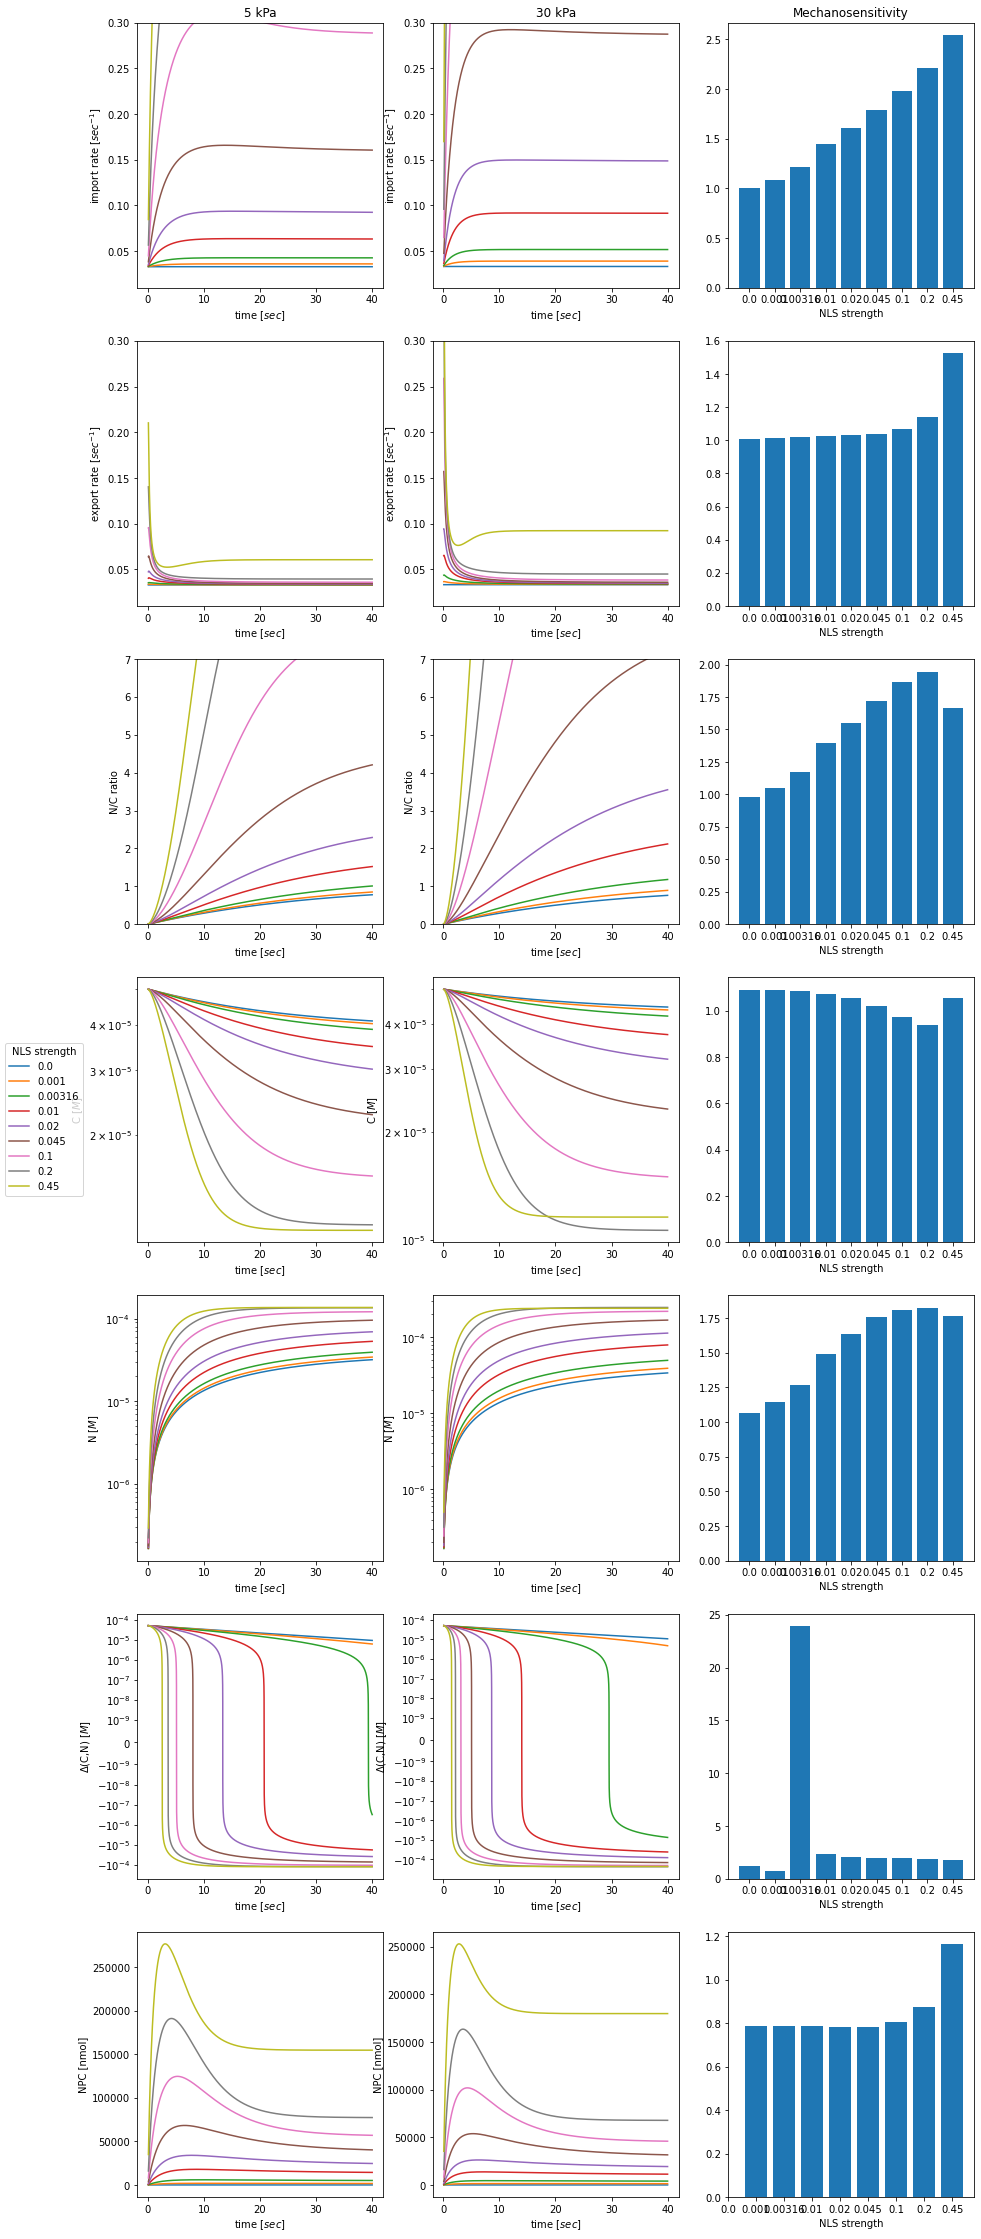

67
Is force False i_NLS 8: OK
Is force True i_NLS 8: OK


/Users/Admin/Public/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in double_scalars
/Users/Admin/Public/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars


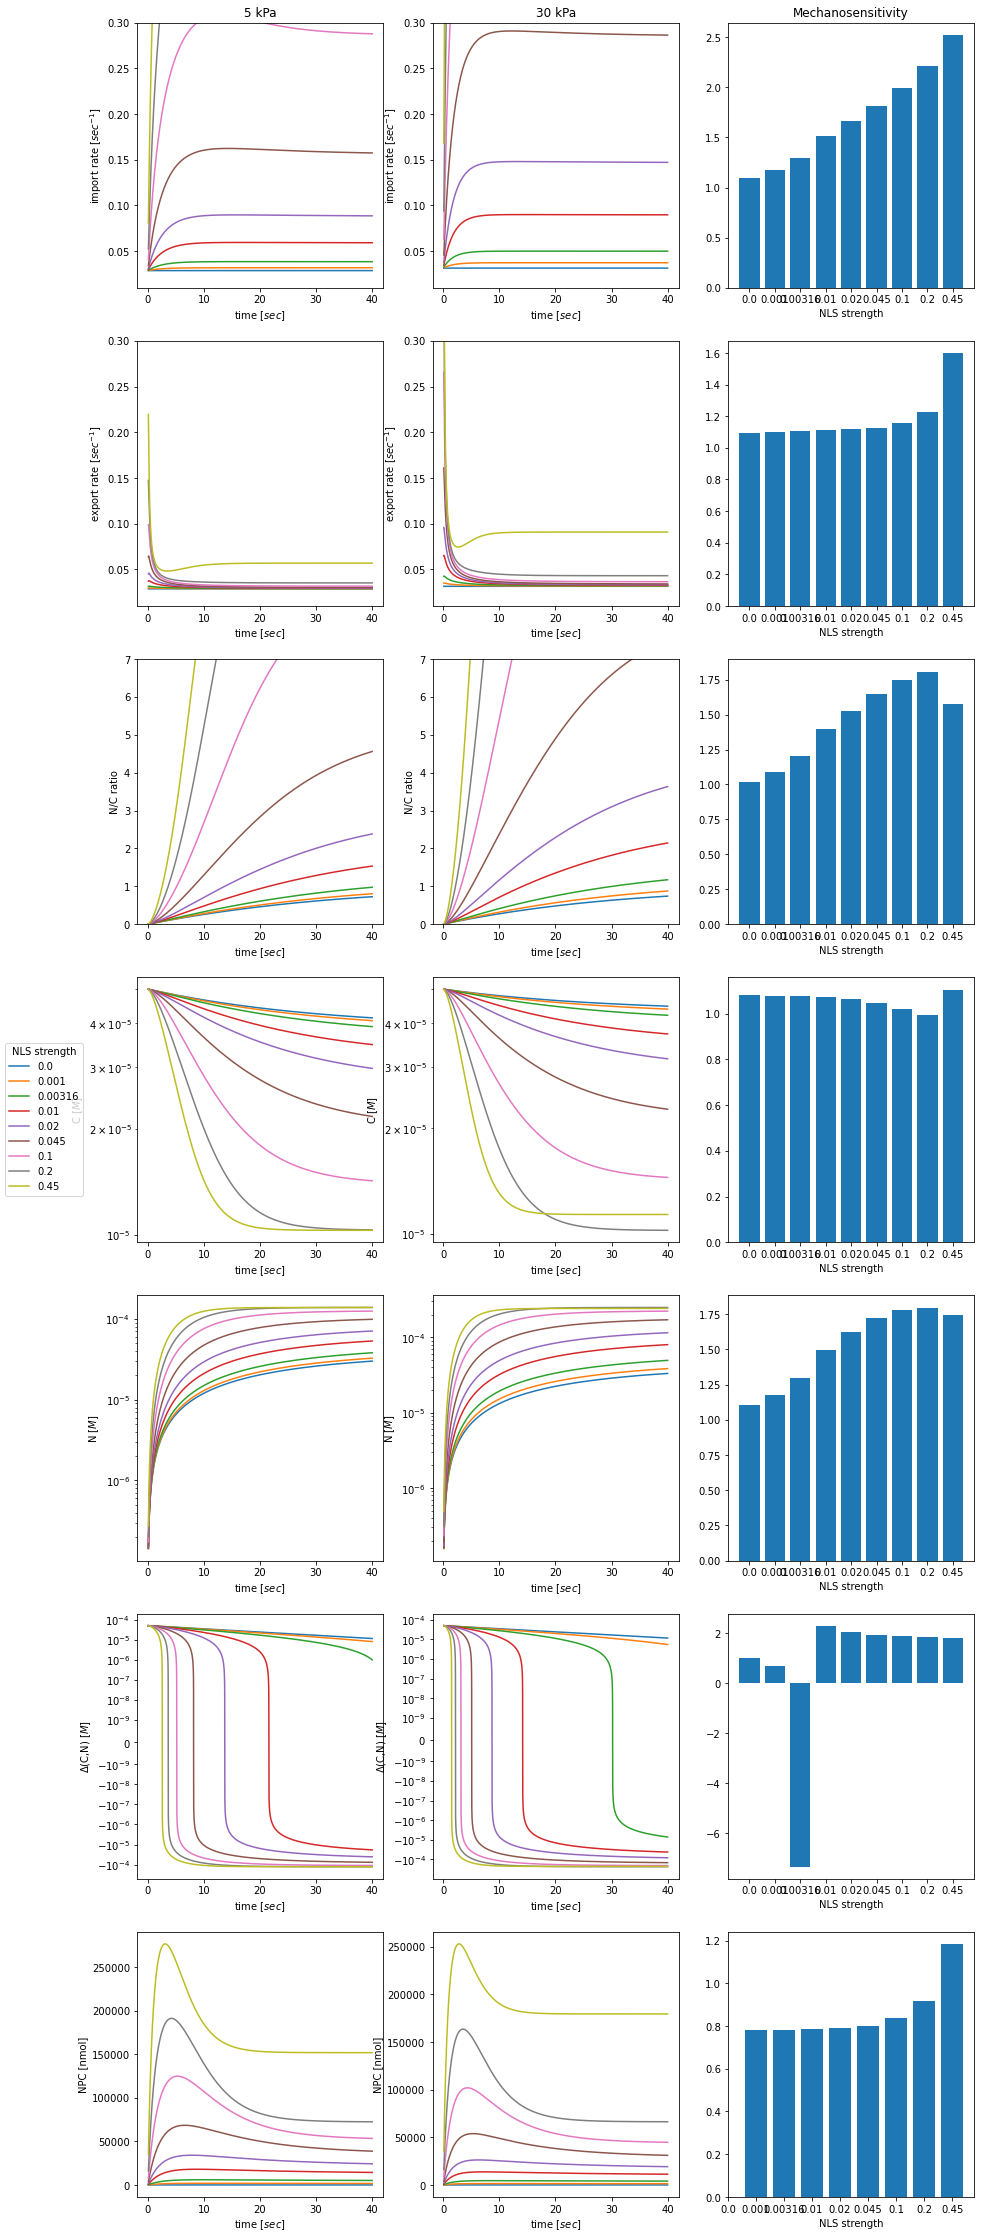

In [25]:
##### TIME CONSUMING #####$
simulation_time_sec= 40.0
n_processors= 6
MW_to_stats_list_by_force= {}            
for MW in [27, 41, 54, 67]:
    print(MW)
    MW_to_stats_list_by_force[MW]= get_MW_stats_list_by_force(MW, simulation_time_sec,
                                                             n_processors= n_processors)
    plot_MW_stats_list(*MW_to_stats_list_by_force[MW])
    plt.show()  

27


/Users/Admin/Public/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in double_scalars
/Users/Admin/Public/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars


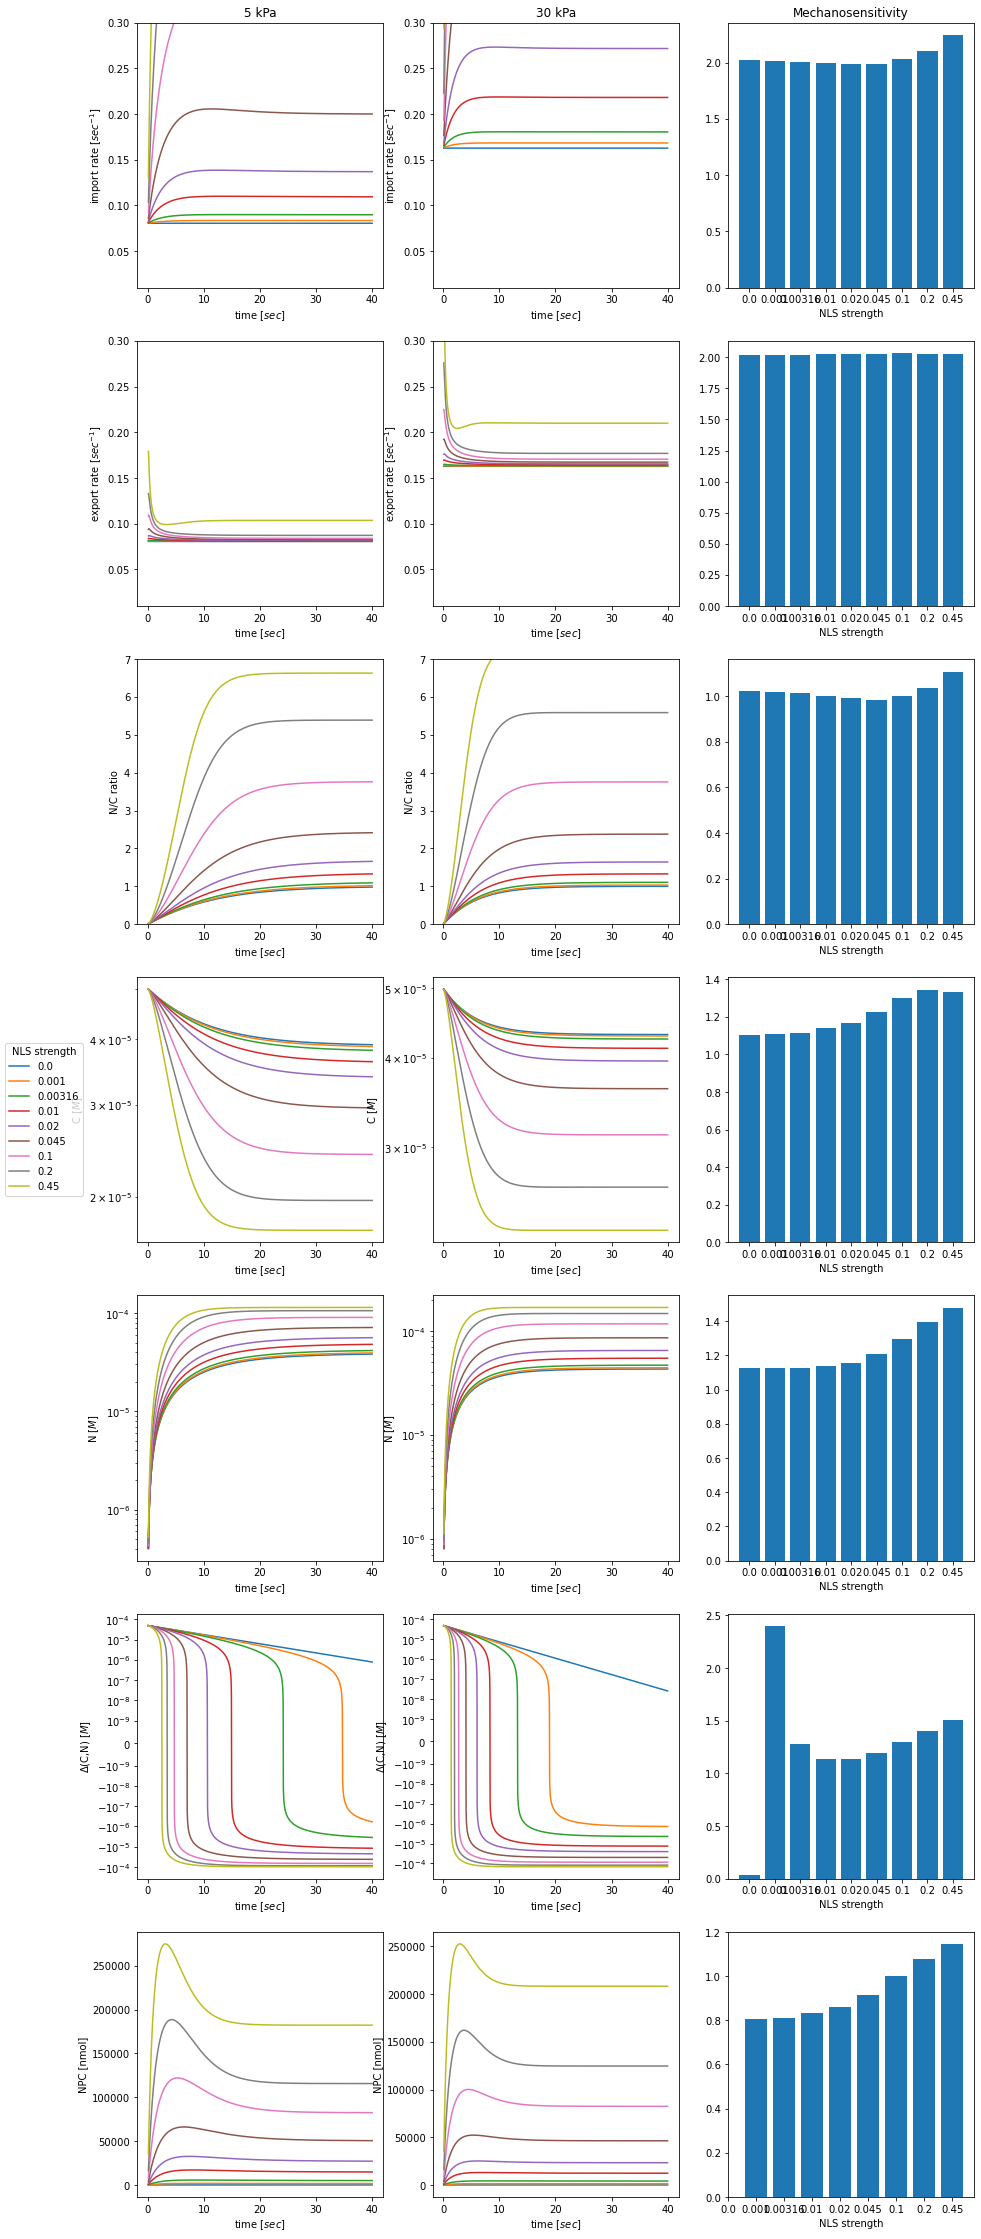

41


/Users/Admin/Public/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in double_scalars
/Users/Admin/Public/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars


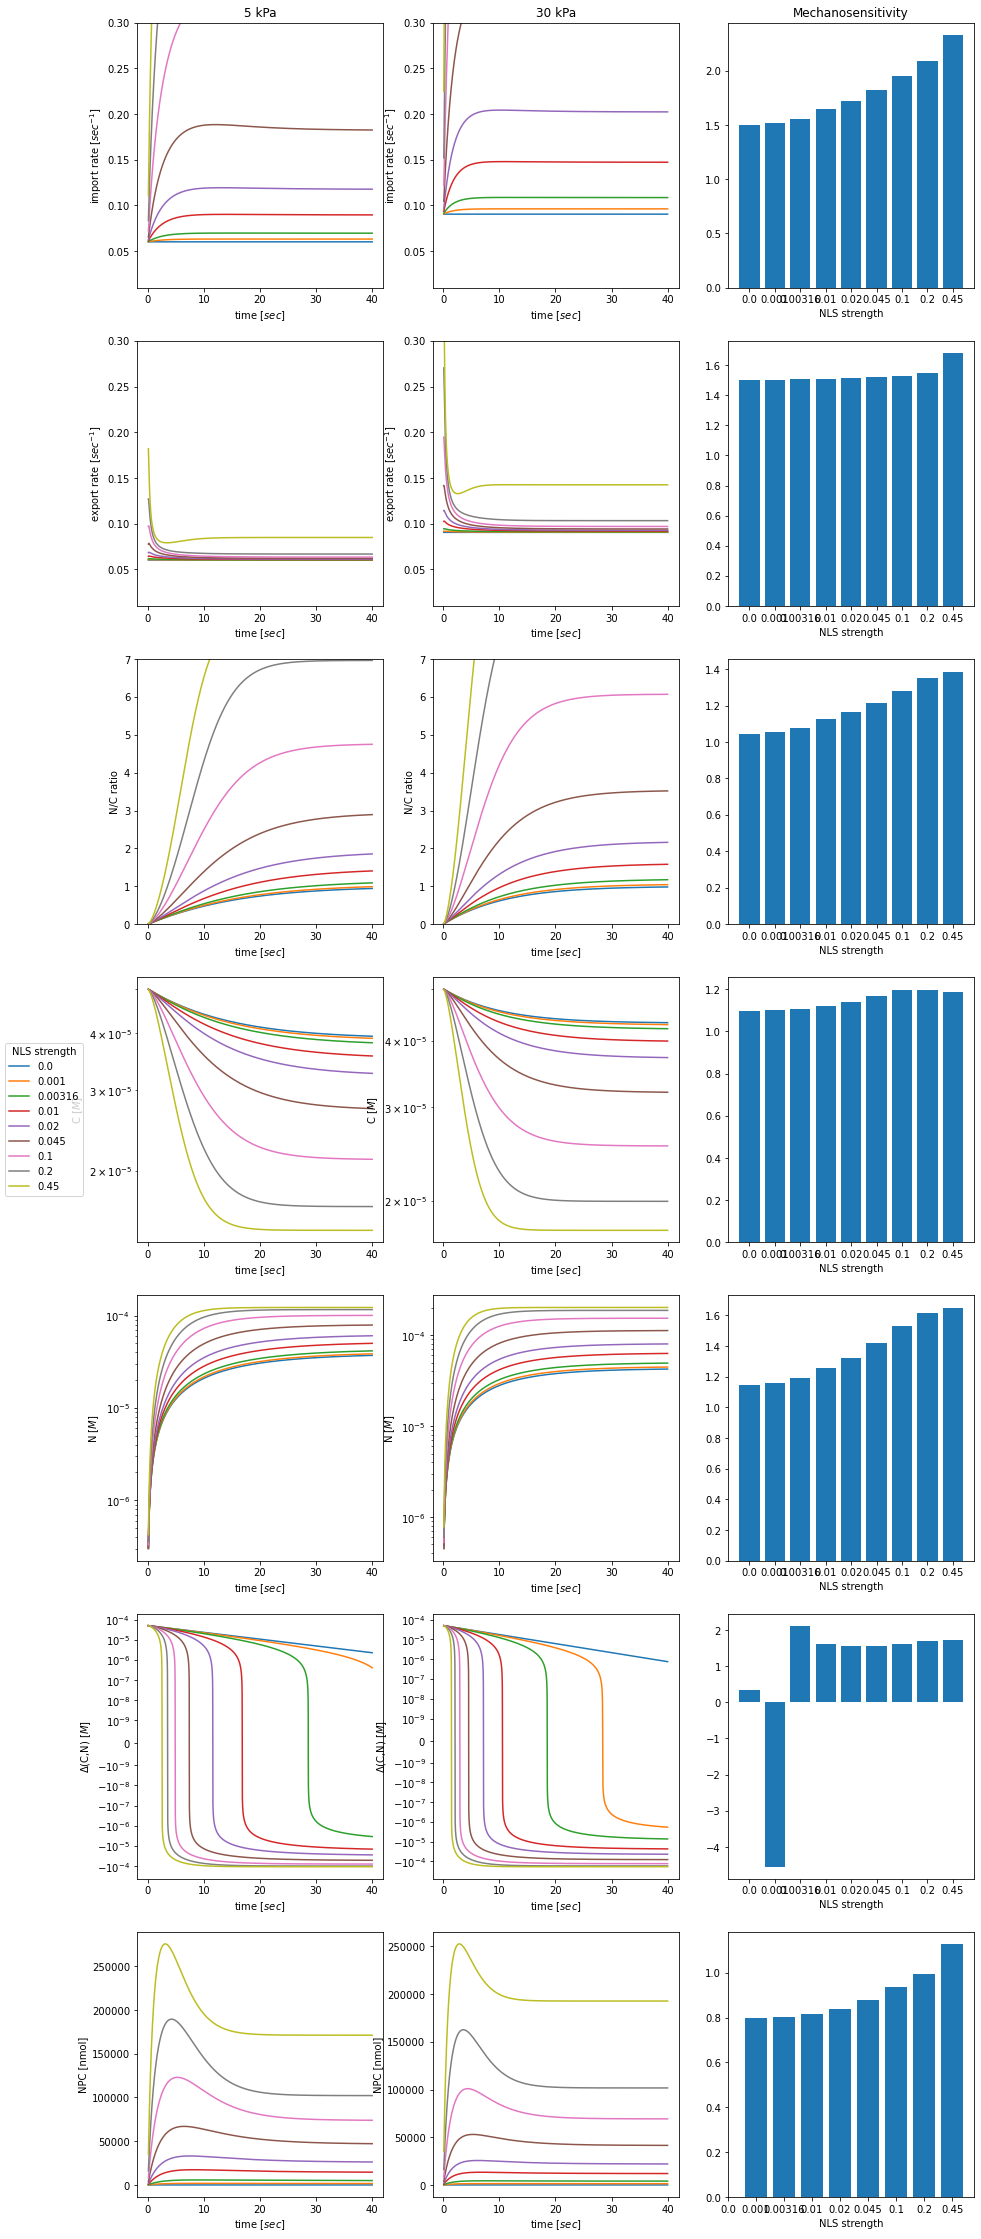

54


/Users/Admin/Public/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in double_scalars
/Users/Admin/Public/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars


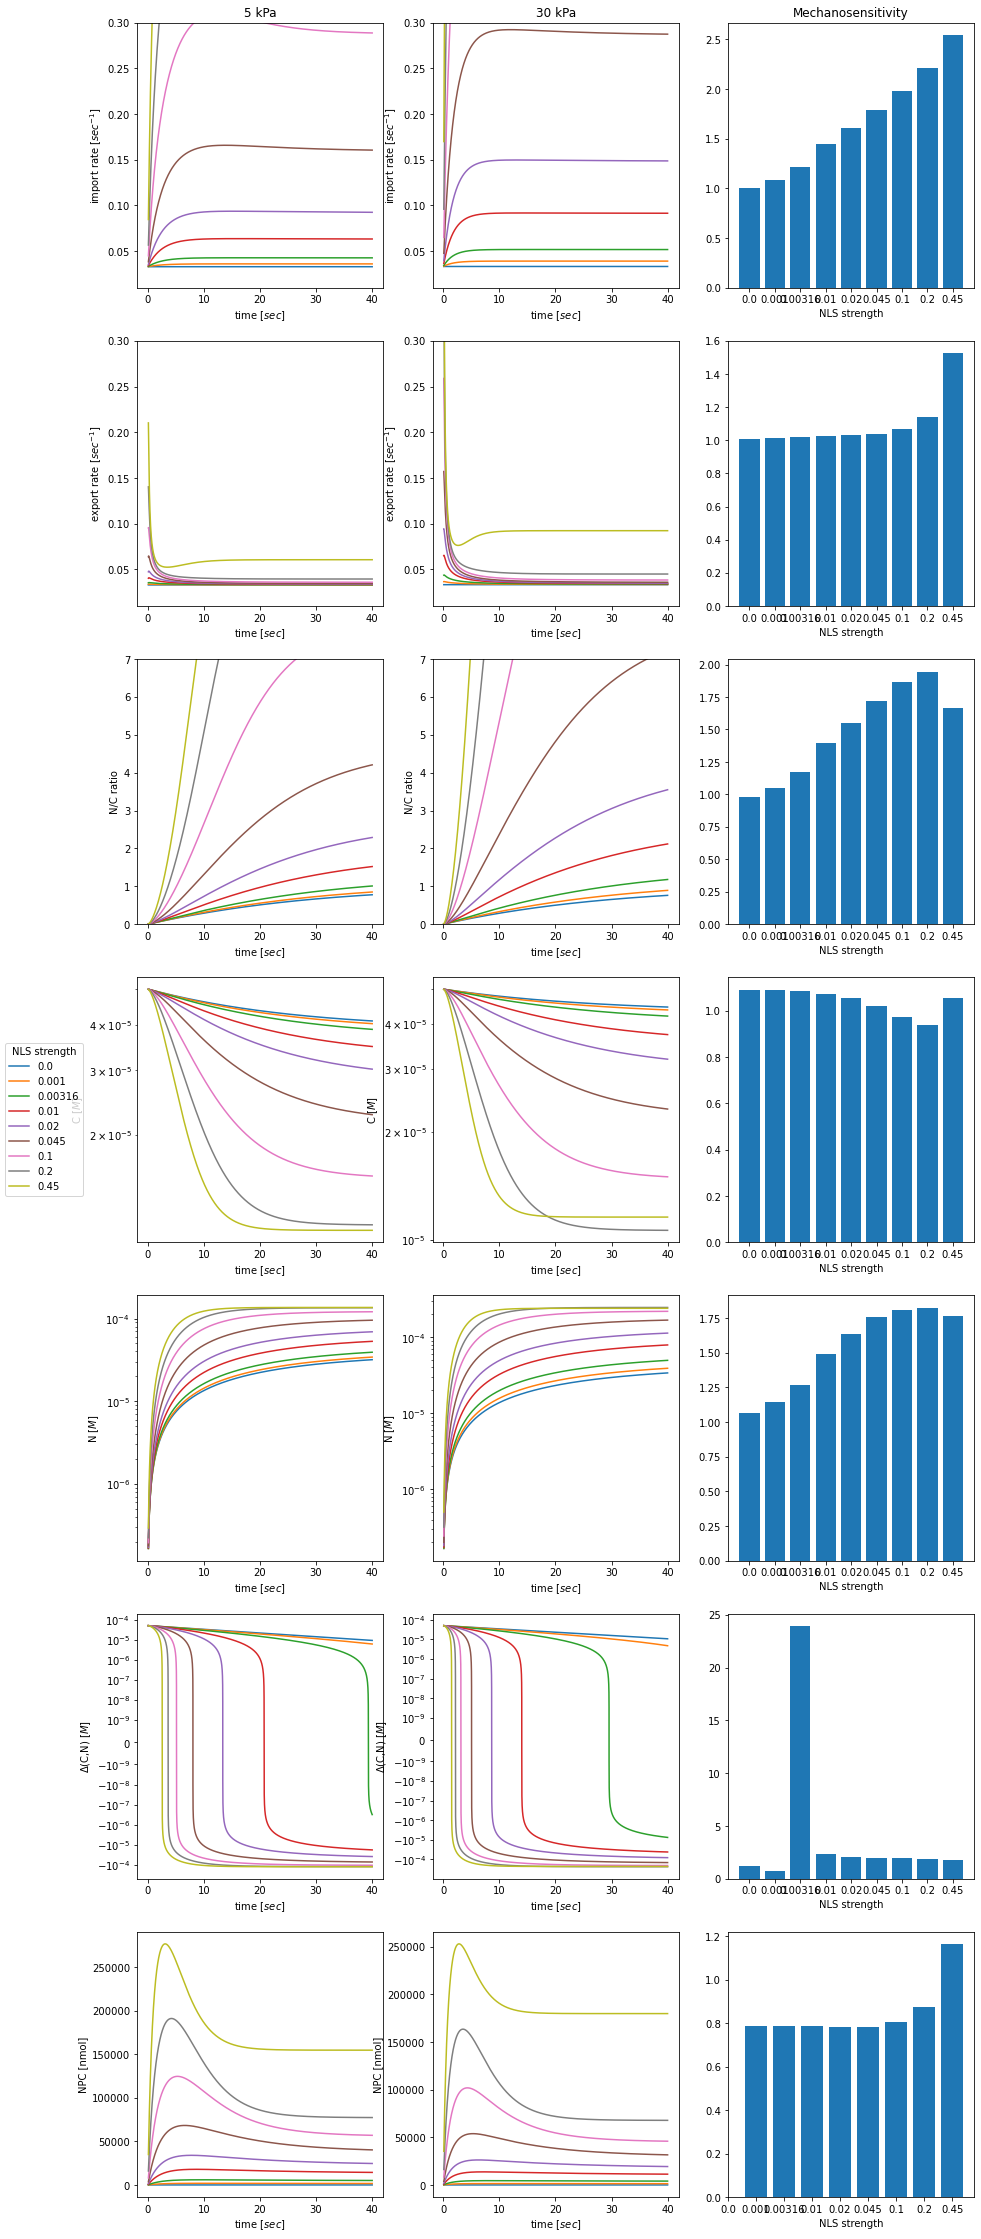

67


/Users/Admin/Public/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in double_scalars
/Users/Admin/Public/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars


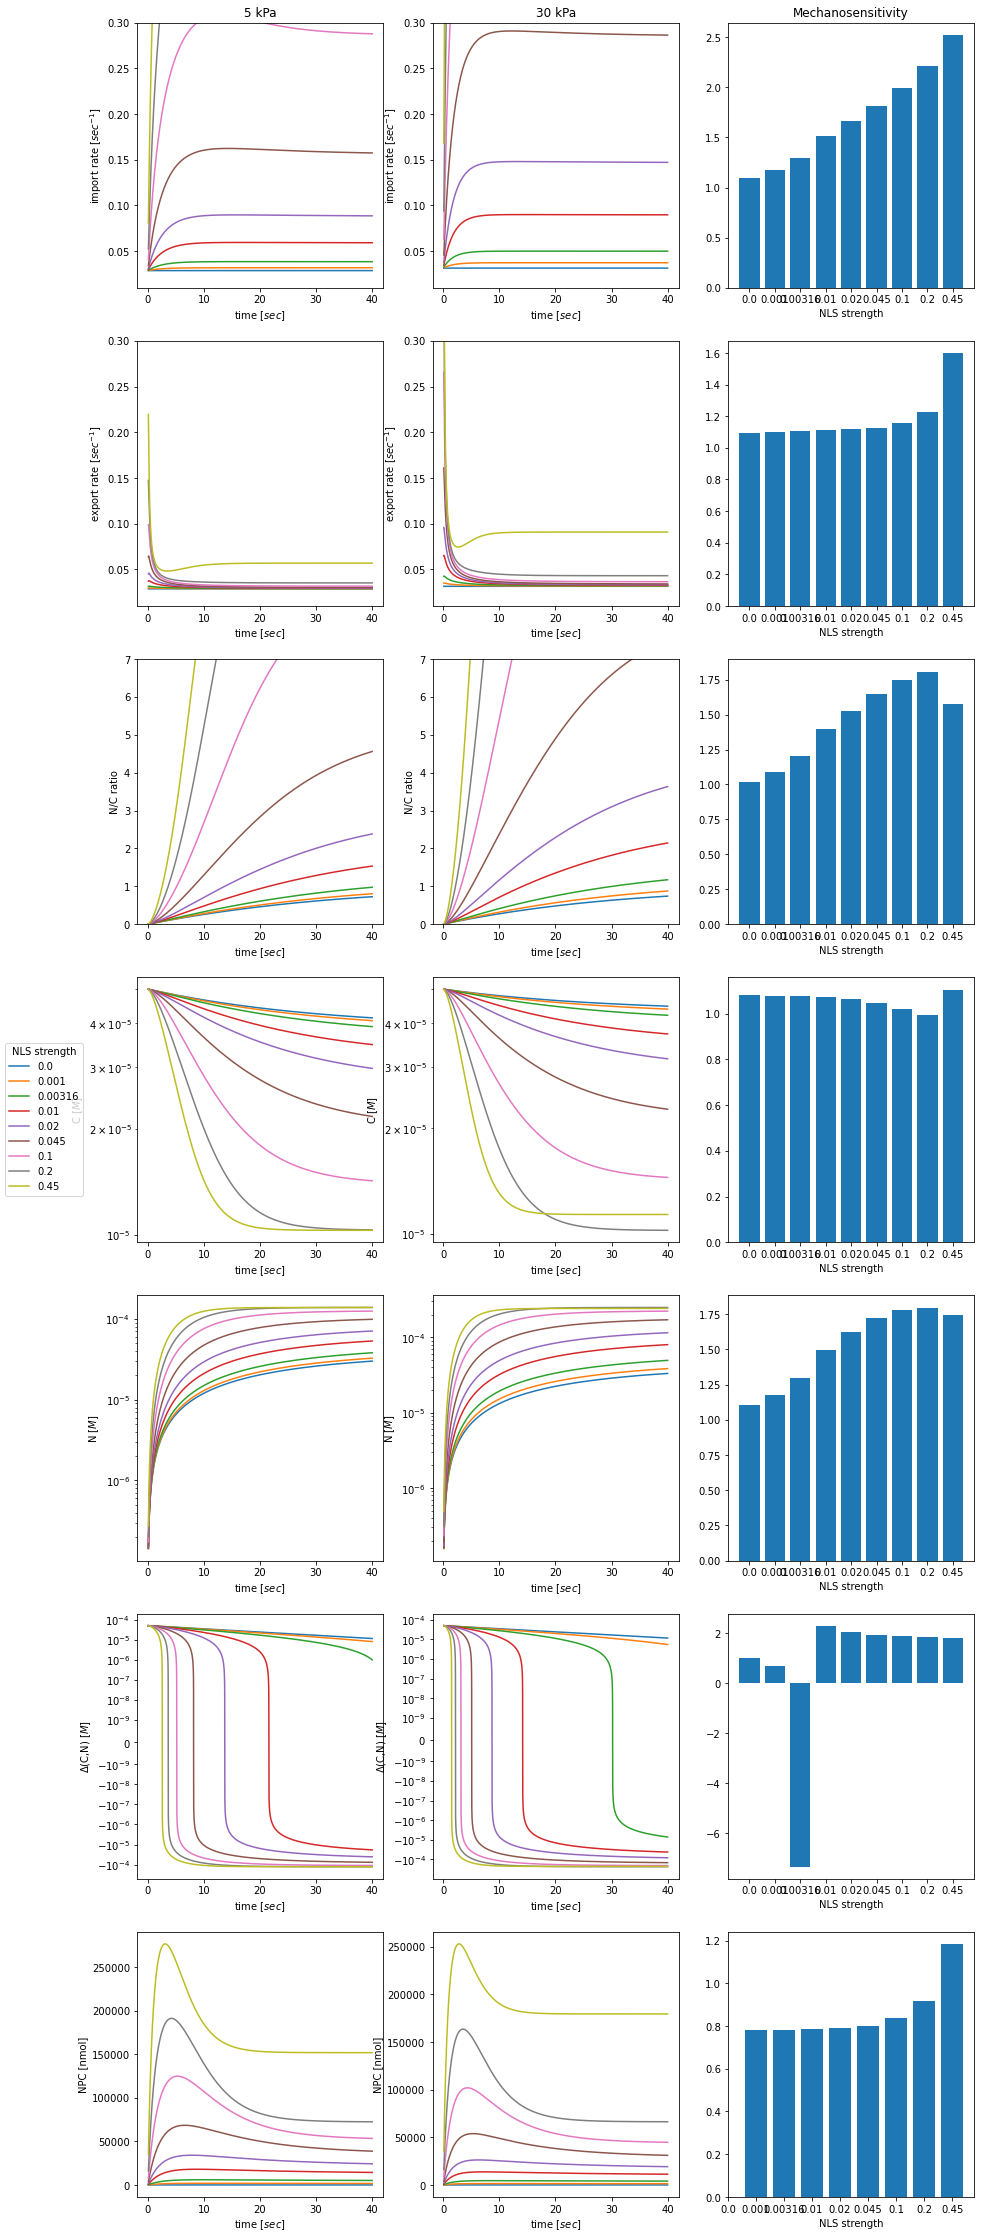

In [26]:
for MW in [27, 41, 54, 67]:
    print(MW)
    plot_MW_stats_list(*MW_to_stats_list_by_force[MW])
    plt.show()